# Современные методы анализа данных и машинного обучения, БИ

## НИУ ВШЭ, 2024-25 учебный год

## Описание задания

<img src="https://pp.userapi.com/c854528/v854528797/c62ce/FiPEibYUxJc.jpg" width="40%">

Netflix за последние 5-10 лет обзавелись большим количеством зрителей. С увеличением числа зрителей увеличилось и разнообразие шоу. Соответственно, перед аналитиками из киноиндустрии встала задача исследования данных с рейтингами различных сериалов.  

В данном задании вам предстоит провести визуальный анализ датасета **1000 Netflix Shows** (по состоянию на 11.06.2017) и сделать выводы.  




* `title` - название шоу.
* `rating` - рейтинг шоу. Например: G, PG, TV-14, TV-MA.
* `ratingLevel` - описание рейтинговой группы и особенностей шоу.
* `ratingDescription` - рейтинг шоу, закодированный числом.
* `release year` - год выпуска шоу.
* `user rating score` - оценка пользователей.
* `user rating size` - общий рейтинг пользователей.

## 0. Скачиваем данные

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving NetflixShows_cleaned.xlsx to NetflixShows_cleaned.xlsx


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel("NetflixShows_cleaned.xlsx")
df.columns

Index(['title', 'rating', 'ratingLevel', 'release year', 'user rating score'], dtype='object')

In [ ]:
df

,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,77.0
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0
...,...,...,...,...,...
494,Russell Madness,PG,some rude humor and sports action,2015,43.0
495,Wiener Dog Internationals,G,General Audiences. Suitable for all ages.,2015,40.0
496,Pup Star,G,General Audiences. Suitable for all ages.,2016,44.0
497,Precious Puppies,TV-G,Suitable for all ages.,2003,61.0


## 1. Работа с пропусками

### Удаляем дубликаты

In [ ]:
display(df.shape)
df.drop_duplicates(inplace=True)
df.shape

(499, 5)

(499, 5)

In [ ]:
display(df[df['rating'] == 'UR']) # нашел интересный артефакт, а именно: Есть только один фильм категории UR, думаю надо будет отдельно его изучить
# Удаляем строку с рейтингом UR
df = df[df['rating'] != 'UR']
df.shape

,title,rating,ratingLevel,release year,user rating score


(499, 5)

### Пропуски в ratingLevel

In [ ]:
df.isna().sum()

,0
title,0
rating,0
ratingLevel,33
release year,0
user rating score,18


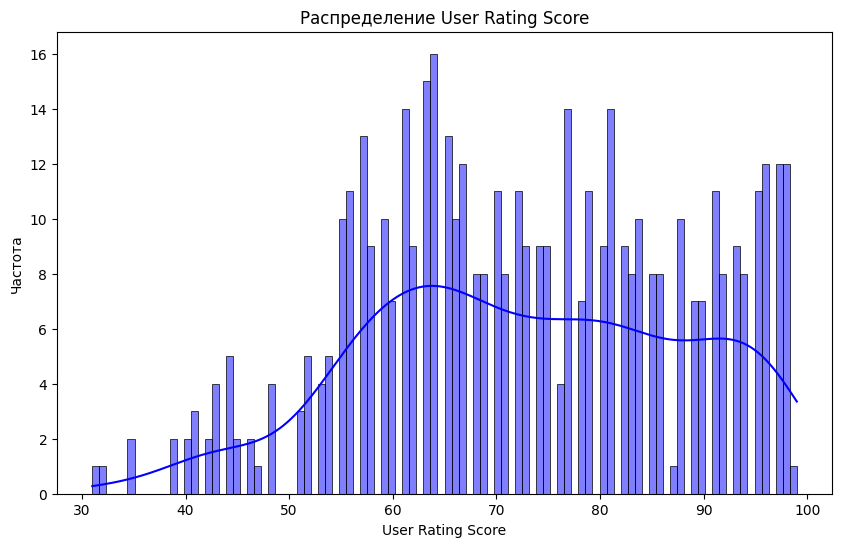

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['user rating score'].dropna(), kde=True, color='blue', bins=100)
plt.title("Распределение User Rating Score")
plt.xlabel("User Rating Score")
plt.ylabel("Частота")
plt.show()

In [ ]:
missing_rating_level = df[df['ratingLevel'].isnull()]

grouped_missing = missing_rating_level.groupby('rating').size()

rating_descriptions = {
    "G": "General Audiences. Suitable for all ages.",
    "PG": "Parental guidance suggested. May not be suitable for children under 10.",
    "PG-13": "Parents strongly cautioned. Some material may be inappropriate for children under 13.",
    "R": "Restricted. Under 17 requires accompanying parent or adult guardian.",
    "NR": "Not Rated. This movie has not been rated officially.",
    "TV-Y": "Designed for children of all ages. Suitable for all children.",
    "TV-Y7": "Suitable for children ages 7 and older.",
    "TV-Y7-FV": "Suitable for children ages 7 and older. Contains fantasy violence.",
    "TV-G": "General audience. Suitable for all ages.",
    "TV-PG": "Parental guidance suggested. May not be suitable for younger children.",
    "TV-14": "Parents strongly cautioned. May be unsuitable for children under 14.",
    "TV-MA": "Mature audience only. May not be suitable for ages under 17.",
}

df['ratingLevel'] = df['rating'].map(rating_descriptions).fillna(df['ratingLevel'])

df.isnull().sum()

,0
title,0
rating,0
ratingLevel,0
release year,0
user rating score,18


### Пропуски в user rating score

In [ ]:
df = df.dropna(subset=['user rating score'])

df.shape

(481, 5)

## 2. Univariate analysis

### Анализ целевой переменной


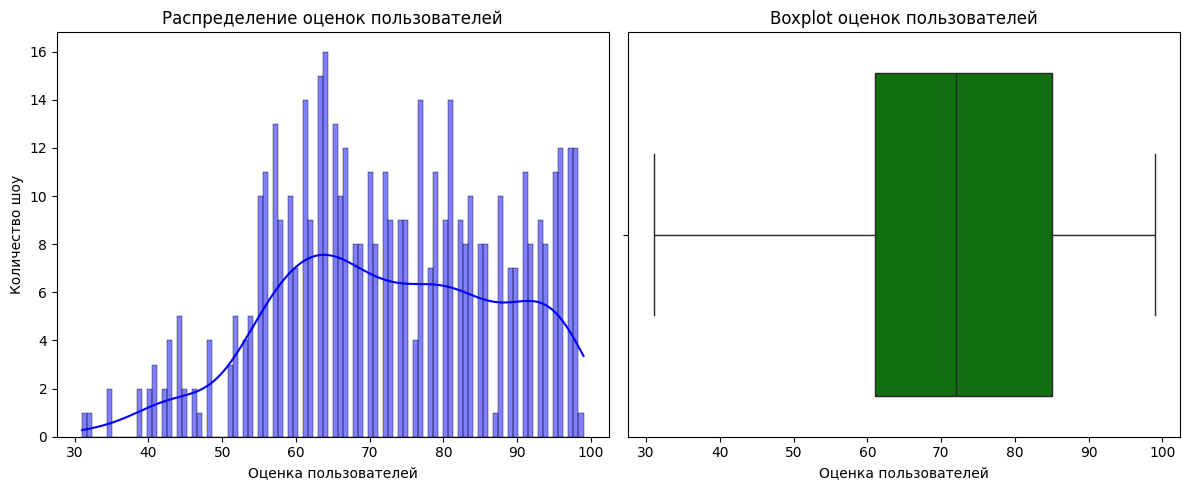

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['user rating score'], bins=100, kde=True, color="blue", ax=axes[0])
axes[0].set_title("Распределение оценок пользователей", fontsize=12)
axes[0].set_xlabel("Оценка пользователей")
axes[0].set_ylabel("Количество шоу")

sns.boxplot(x=df['user rating score'], color="green", ax=axes[1])
axes[1].set_title("Boxplot оценок пользователей", fontsize=12)
axes[1].set_xlabel("Оценка пользователей")

plt.tight_layout()
plt.show()

<ipython-input-24-bdf479bc91ce>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_best_shows['user rating score'], y=top_best_shows['title'], ax=axes[0], palette="Greens", orient='h')
<ipython-input-24-bdf479bc91ce>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_worst_shows['user rating score'], y=top_worst_shows['title'], ax=axes[1], palette="Reds", orient='h')


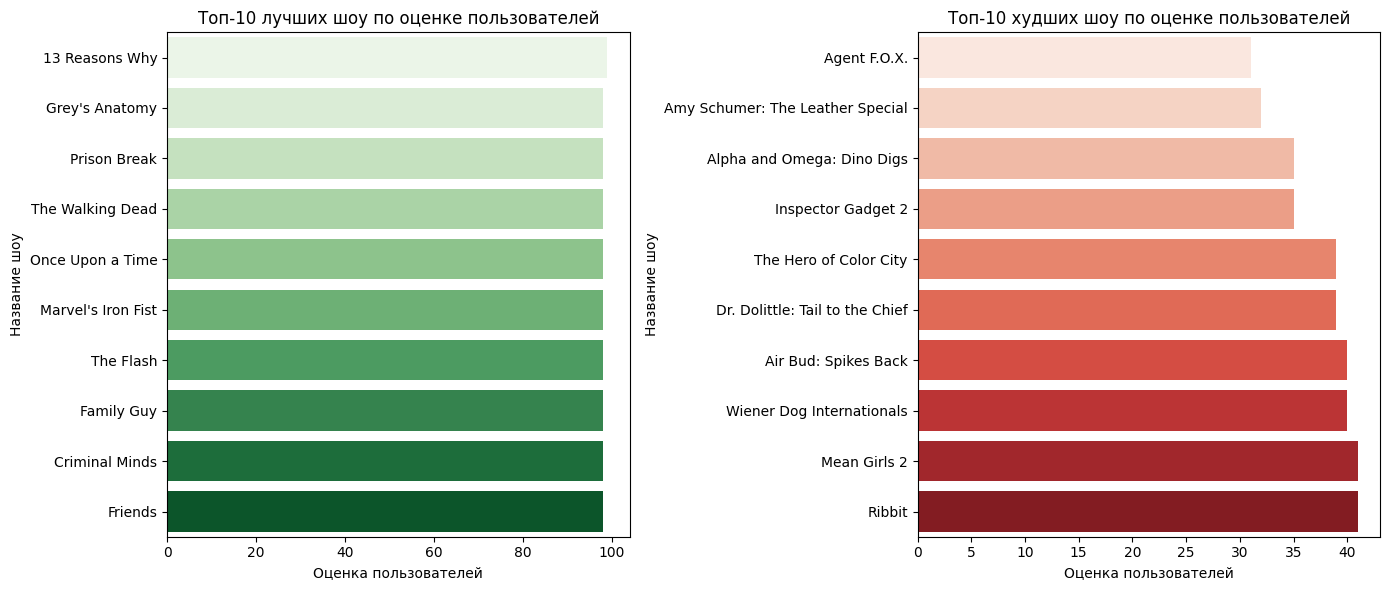

In [ ]:
top_best_shows = df.nlargest(10, 'user rating score')[['title', 'user rating score']]
top_worst_shows = df.nsmallest(10, 'user rating score')[['title', 'user rating score']]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# График 1: Топ-10 лучших шоу
sns.barplot(x=top_best_shows['user rating score'], y=top_best_shows['title'], ax=axes[0], palette="Greens", orient='h')
axes[0].set_title("Топ-10 лучших шоу по оценке пользователей")
axes[0].set_xlabel("Оценка пользователей")
axes[0].set_ylabel("Название шоу")
# График 2: Топ-10 худших шоу
sns.barplot(x=top_worst_shows['user rating score'], y=top_worst_shows['title'], ax=axes[1], palette="Reds", orient='h')
axes[1].set_title("Топ-10 худших шоу по оценке пользователей")
axes[1].set_xlabel("Оценка пользователей")
axes[1].set_ylabel("Название шоу")
plt.tight_layout()
plt.show()

## 3. Multivariate analysis



### Bivariate analysis

### Как изменялась средняя оценка user rating score в зависимости от года выпуска?



In [ ]:
yearly_scores = df.groupby('release year')['user rating score'].mean().reset_index()
yearly_scores.describe()

,release year,user rating score
count,35.000000,35.000000
mean,1998.171429,70.085369
std,14.874941,6.522716
min,1940.000000,58.000000
25%,1991.500000,66.333333
50%,2000.000000,69.000000
75%,2008.500000,74.166667
max,2017.000000,86.000000


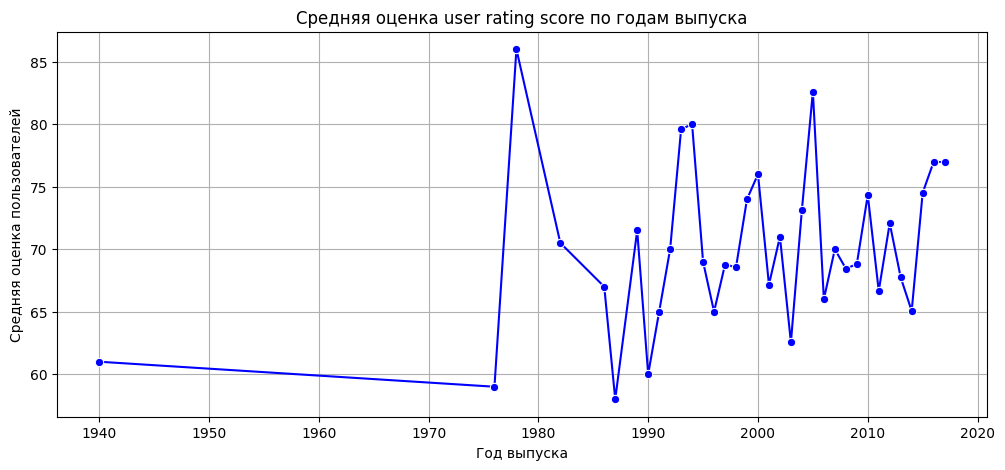

In [ ]:
plt.figure(figsize=(12, 5))
sns.lineplot(
  data=yearly_scores,
  x='release year',
  y='user rating score',
  marker='o',
  color='blue'
  )

plt.title("Средняя оценка user rating score по годам выпуска")
plt.xlabel("Год выпуска")
plt.ylabel("Средняя оценка пользователей")
plt.grid(True)
plt.show()

###### Количестве шоу по годам

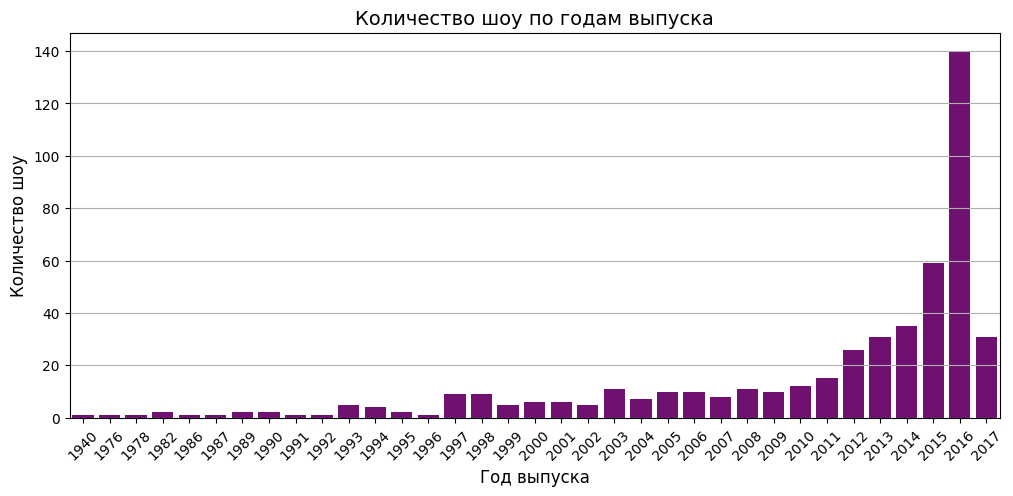

In [ ]:
yearly_counts = df['release year'].value_counts().sort_index()

plt.figure(figsize=(12, 5))
sns.barplot(x=yearly_counts.index, y=yearly_counts.values, color='purple')
plt.title("Количество шоу по годам выпуска", fontsize=14)
plt.xlabel("Год выпуска", fontsize=12)
plt.ylabel("Количество шоу", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

- До 1997 года мало данных → средняя оценка в эти годы может быть не репрезентативной.
- После 2000 года тренд становится надёжным, так как количество шоу выше.
- Периоды с 1-2 шоу в год можно считать нерепрезентативными — средняя оценка в эти годы может быть случайной.

In [ ]:
valid_years = yearly_counts[yearly_counts >= 5].index
filtered_df = df[df['release year'].isin(valid_years)]

In [ ]:
filtered_yearly_scores = filtered_df.groupby('release year')['user rating score'].mean().reset_index()

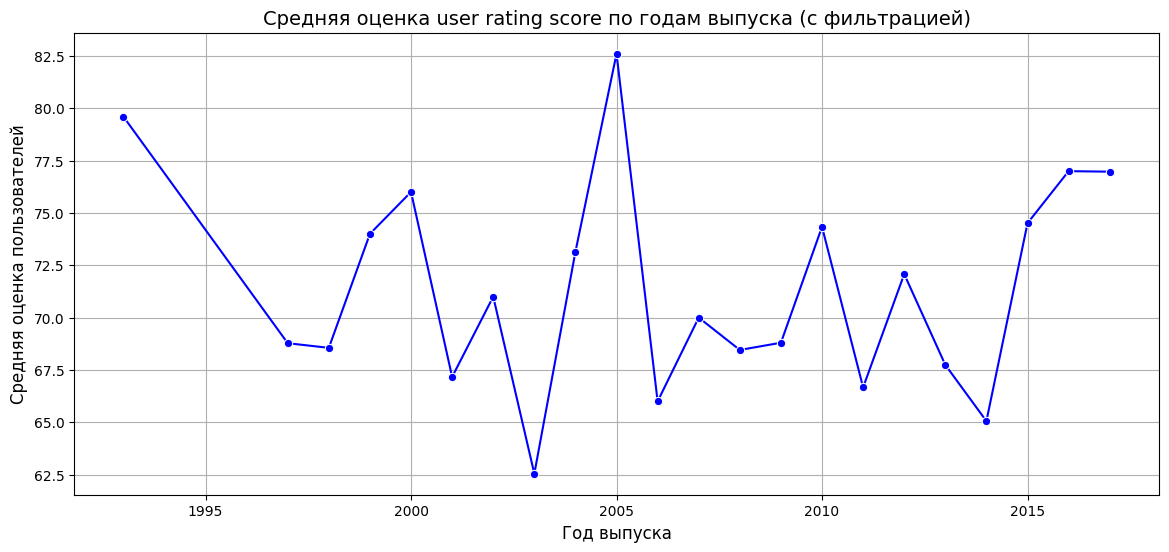

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=filtered_yearly_scores, x='release year', y='user rating score', marker='o', color='blue')
plt.title("Средняя оценка user rating score по годам выпуска (с фильтрацией)", fontsize=14)
plt.xlabel("Год выпуска", fontsize=12)
plt.ylabel("Средняя оценка пользователей", fontsize=12)
plt.grid(True)
plt.show()

#### Распределение оценки по годам

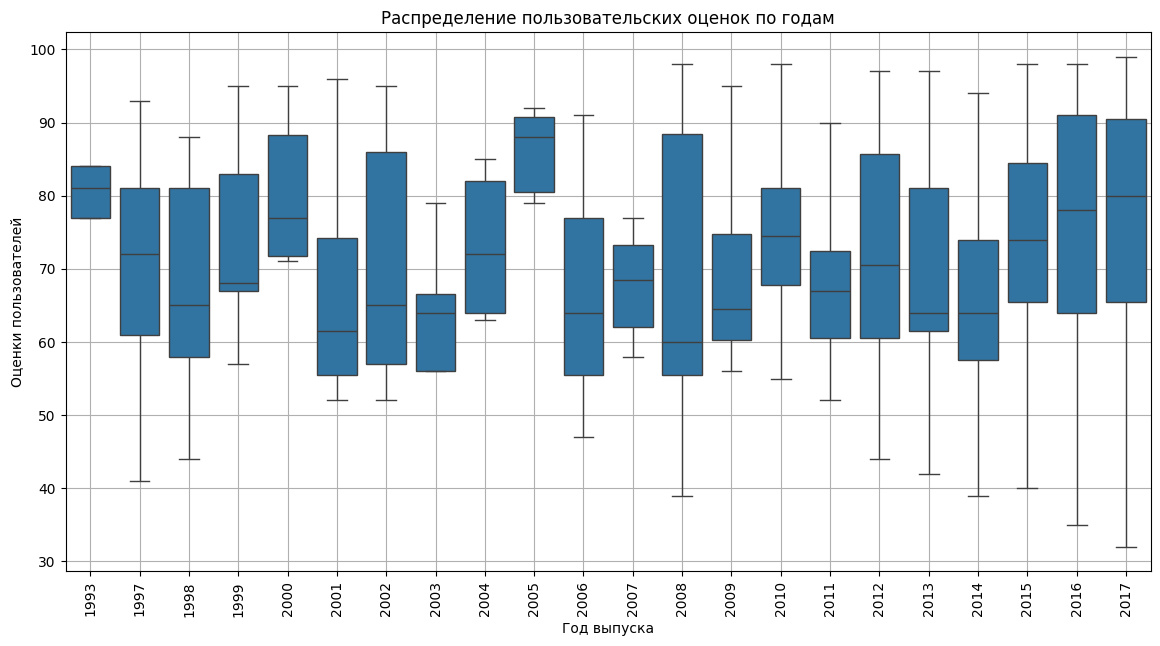

In [ ]:
plt.figure(figsize=(14, 7))
sns.boxplot(x="release year", y="user rating score", data=filtered_df, showfliers=False)
plt.xlabel("Год выпуска")
plt.ylabel("Оценки пользователей")
plt.title("Распределение пользовательских оценок по годам")
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter(
    filtered_df,
    x="user rating score",
    y="release year",
    color="user rating score",
    title="Release Year vs User Rating Score",
    labels={
        "user rating score": "User Rating Score",
        "release year": "Год выпуска"
    }
)

fig.update_yaxes(autorange="reversed")

fig.show()

### **Как год выпуска влияет на user rating score?**

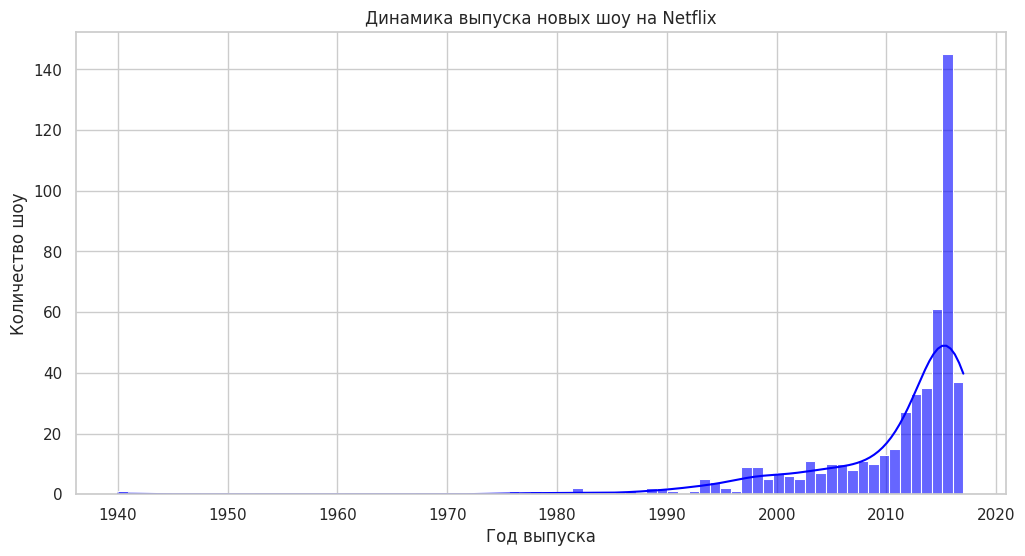

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(df["release year"], bins=80, kde=True, color="blue", alpha=0.6)
plt.xlabel("Год выпуска")
plt.ylabel("Количество шоу")
plt.title("Динамика выпуска новых шоу на Netflix")
plt.show()

#### **Влияние времени выпуска на популярность шоу**

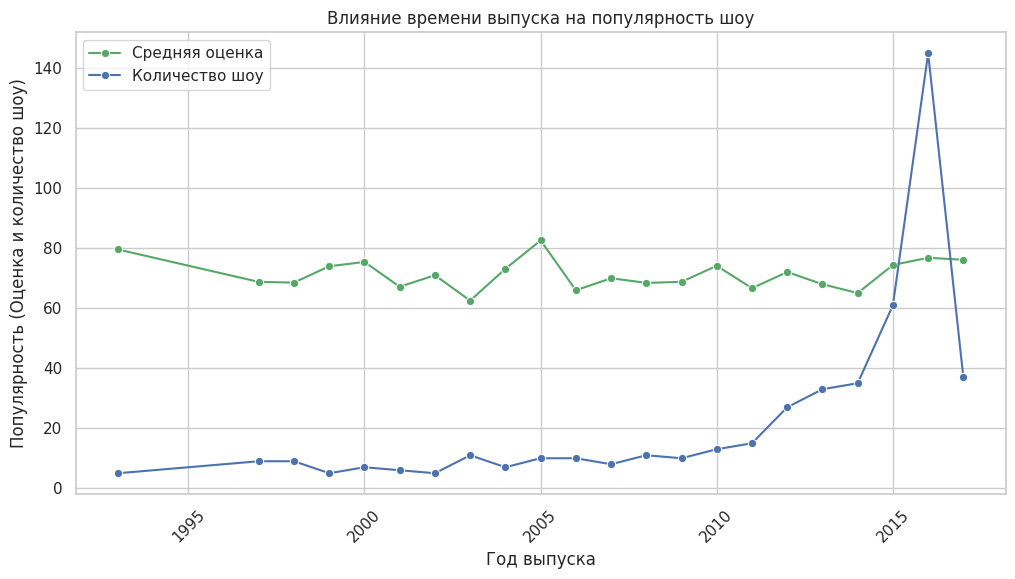

In [ ]:
average_rating_per_year = filtered_df.groupby("release year")["user rating score"].mean()

count_shows_per_year = filtered_df["release year"].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=average_rating_per_year.index, y=average_rating_per_year.values, marker="o", label="Средняя оценка", color="g")
sns.lineplot(x=count_shows_per_year.index, y=count_shows_per_year.values, marker="o", label="Количество шоу", color="b")

plt.xlabel("Год выпуска")
plt.ylabel("Популярность (Оценка и количество шоу)")
plt.title("Влияние времени выпуска на популярность шоу")
plt.legend()
plt.xticks(rotation=45)
plt.show()

Несмотря на увеличение количества шоу в последние годы, средние оценки не показывают значительного роста. Это может свидетельствовать о том, что с увеличением объема производства Netflix выпускает как популярные, так и менее успешные проекты

### Связь между количеством новых шоу и их средним рейтингом

<Figure size 1500x800 with 0 Axes>

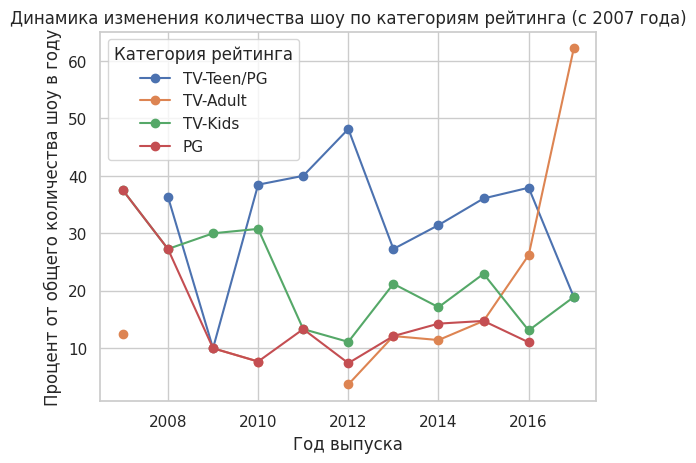

In [ ]:
df_copy['rating_cleaned'] = df_copy['rating'].replace(rating_mapping)

df_filtered = df_copy[df_copy['release year'] >= 2007]

rating_trends = df_filtered.groupby(['release year', 'rating_cleaned']).size().unstack()

rating_percentage = rating_trends.div(rating_trends.sum(axis=1), axis=0) * 100

plt.figure(figsize=(15, 8))
rating_percentage[['TV-Teen/PG', 'TV-Adult', 'TV-Kids', 'PG']].plot(kind='line', marker='o', linestyle='-')
plt.title("Динамика изменения количества шоу по категориям рейтинга (с 2007 года)")
plt.xlabel("Год выпуска")
plt.ylabel("Процент от общего количества шоу в году")
plt.legend(title="Категория рейтинга")
plt.grid(True)
plt.show()

### Как название влияет на рейтинг?

#### Зависимость рейтинга зрителей от длины названия фильма

In [ ]:
df['title'] = df['title'].astype(str)

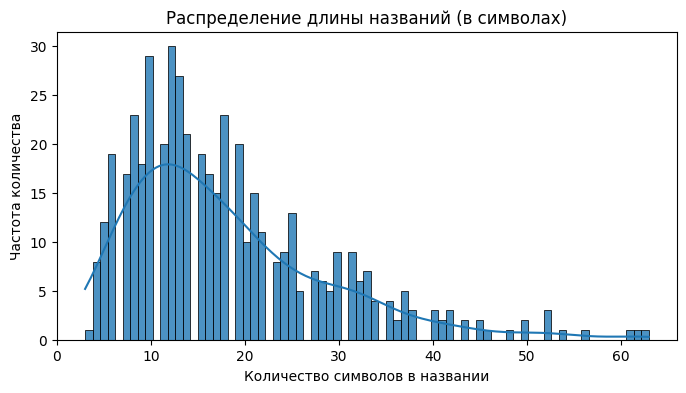

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df['title'].apply(len), kde=True, bins=75,alpha = 0.8)
plt.title('Распределение длины названий (в символах)')
plt.xlabel('Количество символов в названии')
plt.ylabel('Частота количества')
plt.show()

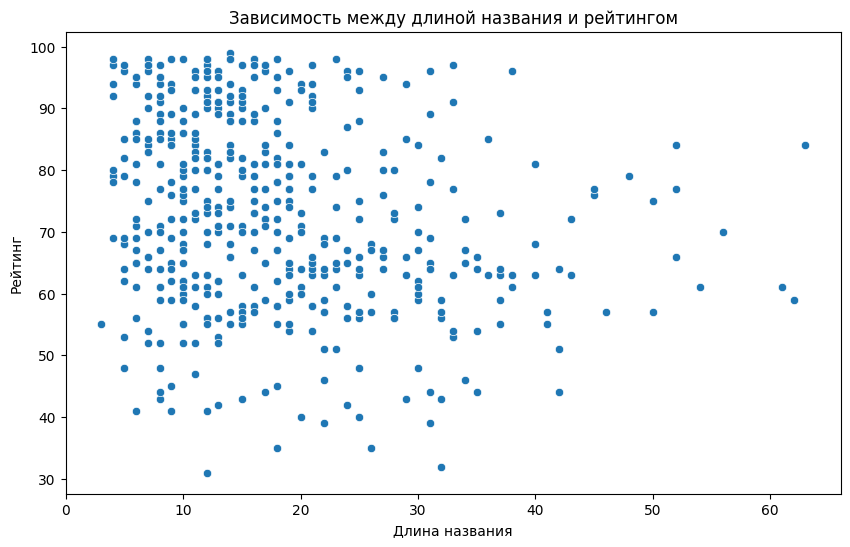

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['title'].apply(len), y=df['user rating score'])
plt.title('Зависимость между длиной названия и рейтингом')
plt.xlabel('Длина названия')
plt.ylabel('Рейтинг')
plt.show()

Очень длинные названия (40+ символов) чаще имеют низкие или средние рейтинги.
Возможно, длинные и сложные названия хуже запоминаются.
Оптимальной длиной названия является 5-25 символов, так как фильмы с такой длиной названия чаще получают средний/высокий рейтинг  

In [ ]:
short_titles = df[df['title'].apply(len) < 25]
long_titles = df[df['title'].apply(len) >= 25]

avg_rating_short = short_titles['user rating score'].mean()
avg_rating_long = long_titles['user rating score'].mean()

print(f"Средний рейтинг для коротких названий: {avg_rating_short}")
print(f"Средний рейтинг для длинных названий: {avg_rating_long}")

Средний рейтинг для коротких названий: 74.71236559139786
Средний рейтинг для длинных названий: 66.13761467889908


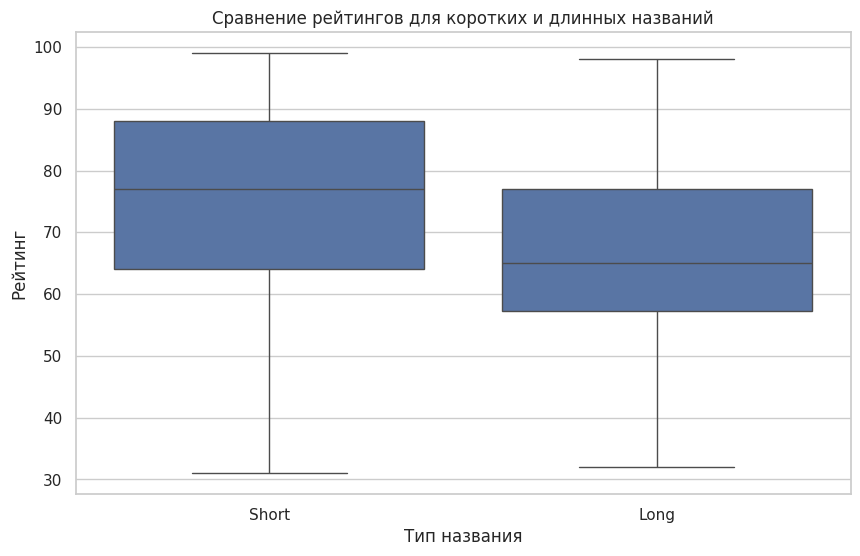

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['title'].apply(lambda x: 'Short' if len(x) < 20 else 'Long'), y=df['user rating score'])
plt.title("Сравнение рейтингов для коротких и длинных названий")
plt.xlabel('Тип названия')
plt.ylabel('Рейтинг')
plt.show()

#### Какие слова в названиях встречаются чаще всего.

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from collections import Counter
import re

def tokenize_titles(title):
    words = re.findall(r'\b\w+\b', title.lower())
    return [word for word in words if word not in stop_words]

all_words = []
df['title'].apply(lambda x: all_words.extend(tokenize_titles(x)))

word_freq = Counter(all_words)

# Топ-20 самых частых слов
top_20_words = word_freq.most_common(20)
print("Топ-20 самых частых слов:", top_20_words)

Топ-20 самых частых слов: [('2', 14), ('little', 13), ('life', 9), ('movie', 9), ('american', 8), ('super', 8), ('marvel', 7), ('friends', 6), ('show', 6), ('adventures', 6), ('lego', 6), ('new', 5), ('wars', 5), ('power', 5), ('rangers', 5), ('secret', 4), ('one', 4), ('night', 4), ('girls', 4), ('back', 4)]


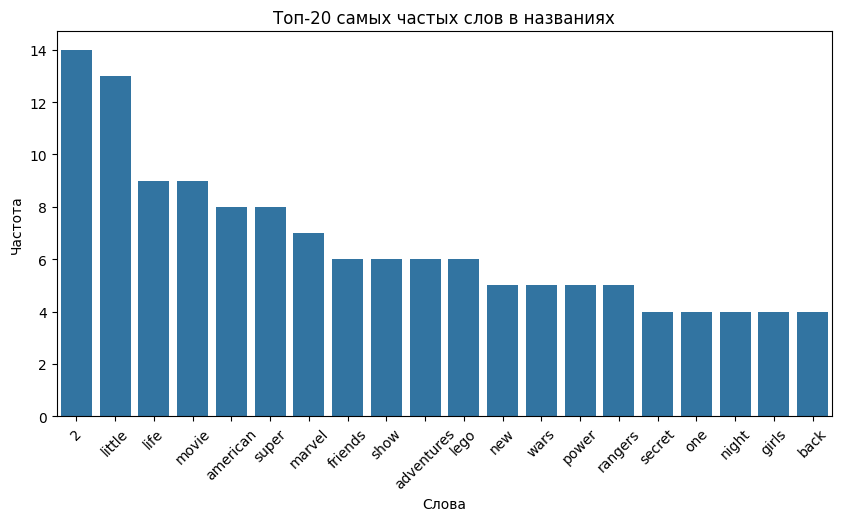

In [ ]:
words, counts = zip(*top_20_words)

plt.figure(figsize=(10,5))
sns.barplot(x=list(words), y=list(counts))
plt.title('Топ-20 самых частых слов в названиях')
plt.xlabel('Слова')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.show()

Получили результаты, что можно заметить
Популярны сиквелы и части (например, '2', что намекает на продолжения фильмов). Смысловые слова: 'little', 'life', 'friends', 'adventures', 'world', 'secret', 'night'. Франшизы: 'marvel', 'lego', 'power rangers', 'wars'. Развлекательные форматы: 'movie', 'show'.

#### Как слова в названии влияют на рейтинг от зрителей.

In [ ]:
top_words = [word for word, count in top_20_words]

word_rating_stats = {}

for word in top_words:
    has_word = df[df['title'].str.contains(fr'\b{word}\b', case=False, na=False)]
    no_word = df[~df['title'].str.contains(fr'\b{word}\b', case=False, na=False)]

    mean_with = has_word['user rating score'].mean()
    mean_without = no_word['user rating score'].mean()

    word_rating_stats[word] = (mean_with, mean_without)

df_word_rating = pd.DataFrame(word_rating_stats, index=['Рейтинг (слово есть)', 'Рейтинг (слово нет)']).T
df_word_rating.sort_values(by='Рейтинг (слово есть)', ascending=False, inplace=True)

print(df_word_rating.head(20))

            Рейтинг (слово есть)  Рейтинг (слово нет)
new                    81.200000            72.680672
night                  77.250000            72.731656
show                   76.666667            72.720000
marvel                 76.142857            72.719409
one                    75.500000            72.746331
american               74.500000            72.739958
wars                   73.000000            72.767782
life                   67.777778            72.864407
little                 67.538462            72.914530
friends                67.166667            72.840000
secret                 67.000000            72.817610
power                  66.400000            72.836134
rangers                66.400000            72.836134
movie                  64.777778            72.921610
lego                   63.500000            72.886316
2                      62.642857            73.072805
adventures             61.500000            72.911579
super                  59.57

#### Топ-20 слов

<Figure size 1000x600 with 0 Axes>

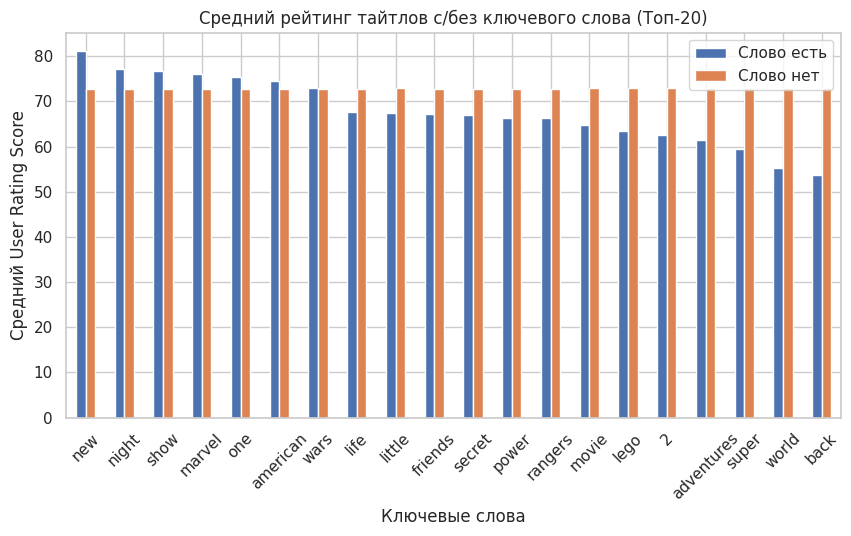

In [ ]:
plt.figure(figsize=(10,6))

top_n = 20
df_word_rating.iloc[:top_n].plot(kind='bar', figsize=(10,5))
plt.title(f'Средний рейтинг тайтлов с/без ключевого слова (Топ-{top_n})')
plt.xlabel('Ключевые слова')
plt.ylabel('Средний User Rating Score')
plt.xticks(rotation=45)
plt.legend(["Слово есть", "Слово нет"])
plt.show()

##### *Что* заметим?

Проекты с "Marvel" в названии получают в среднем на 6.3 балла выше, что говорит о том, что супергеройские фильмы и франшиза Marvel популярны среди зрителей. Слово "Show" тоже пользуется успехом, наверное, из-за того, что многие зрители предпочитают смотреть шоу, вместо фильмов, из-за нехватки времени в определенный период суток. "Night" и "One" тоже дают небольшое улучшение.

Фильмы и сериалы со словом "Back" сильно теряют в рейтинге (-8.8 баллов!). "World" и "Wars" тоже дают отрицательные оценки от пользователей. "Lego" тоже снижает рейтинг. Возможно, многие фильмы или мультфильмы LEGO не оправдывают ожиданий или становятся неинтересными для подростающих зрителей Netflix. Также продолжения фильмов или сериалов, имеющих в названии "2" понижают рейтинг, скорее всего ожидания пользователей не оправдываются после просмотра второй части фильма или сериала.

#### С какими словами фильмыы получают большой рейтинг, а какие маленький?

In [ ]:
top_titles = df.nlargest(100, 'user rating score')  # Топ-100 фильмов
bottom_titles = df.nsmallest(100, 'user rating score')  # Bottom-100 фильмов

top_titles['category'] = 'Top-100'
bottom_titles['category'] = 'Bottom-100'

comparison_df = pd.concat([top_titles, bottom_titles], ignore_index=True)
print(comparison_df[['title', 'user rating score', 'category']])

                                                 title  user rating score  \
0                                       13 Reasons Why               99.0   
1                                       Grey's Anatomy               98.0   
2                                         Prison Break               98.0   
3                                     The Walking Dead               98.0   
4                                     Once Upon a Time               98.0   
..                                                 ...                ...   
195                                         Nancy Drew               59.0   
196                     The Smurfs and the Magic Flute               59.0   
197                             Tad: The Lost Explorer               59.0   
198                   Transformers: Robots in Disguise               59.0   
199  Disney Animation Collection: Vol. 4: The Torto...               59.0   

       category  
0       Top-100  
1       Top-100  
2       Top-100  
3  

In [ ]:
top_words = []
comparison_df[comparison_df['category'] == 'Top-100']['title'].apply(lambda x: top_words.extend(
    [word for word in re.findall(r'\b\w+\b', x.lower()) if word not in stop_words]
))
top_word_freq = Counter(top_words)

bottom_words = []
comparison_df[comparison_df['category'] == 'Bottom-100']['title'].apply(lambda x: bottom_words.extend(
    [word for word in re.findall(r'\b\w+\b', x.lower()) if word not in stop_words]
))
bottom_word_freq = Counter(bottom_words)

print("Частые слова в топ-100 названиях (без стоп-слов):", top_word_freq.most_common(10))
print("Частые слова в bottom-100 названиях (без стоп-слов):", bottom_word_freq.most_common(10))

Частые слова в топ-100 названиях (без стоп-слов): [('marvel', 3), ('new', 3), ('show', 3), ('lost', 2), ('u', 2), ('little', 2), ('girl', 2), ('movie', 2), ('wars', 2), ('kung', 2)]
Частые слова в bottom-100 названиях (без стоп-слов): [('2', 6), ('movie', 5), ('hero', 3), ('air', 3), ('back', 3), ('little', 3), ('man', 3), ('adventures', 3), ('x', 2), ('dino', 2)]


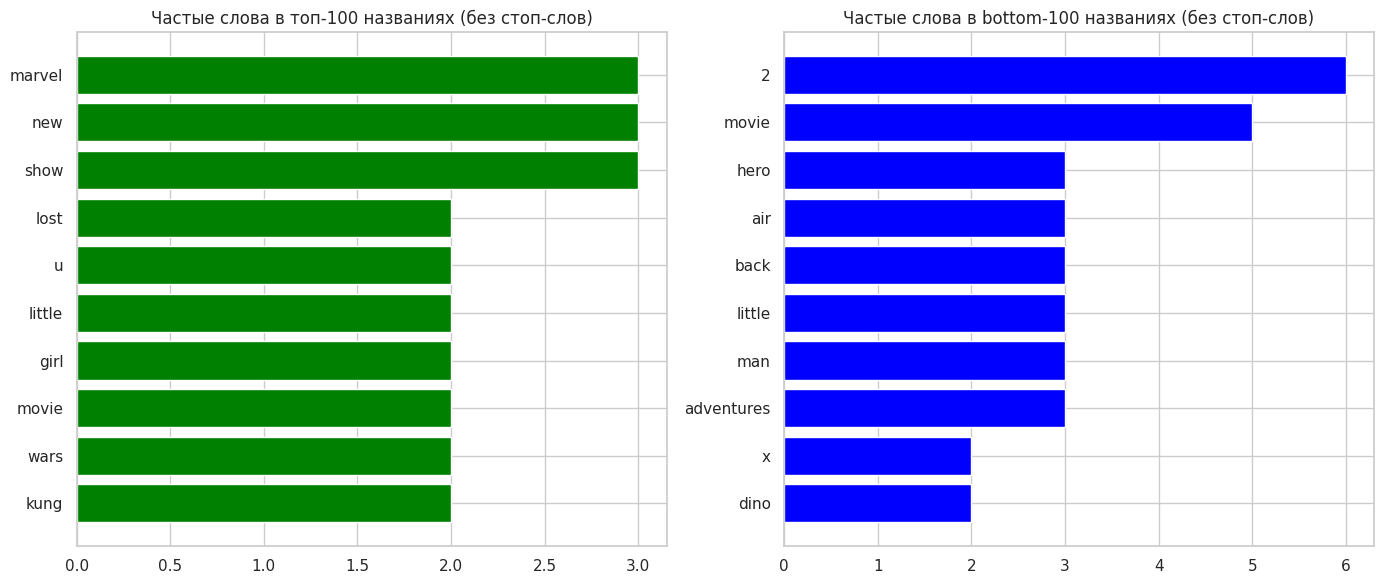

In [ ]:
top_df = pd.DataFrame(top_word_freq.most_common(10), columns=['word', 'count'])
bottom_df = pd.DataFrame(bottom_word_freq.most_common(10), columns=['word', 'count'])

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].barh(top_df['word'], top_df['count'], color='green')
axes[0].set_title('Частые слова в топ-100 названиях (без стоп-слов)')
axes[0].invert_yaxis()

axes[1].barh(bottom_df['word'], bottom_df['count'], color='blue')
axes[1].set_title('Частые слова в bottom-100 названиях (без стоп-слов)')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

### **Как средняя оценка user rating score зависит от категории рейтинга (rating)?**

<ipython-input-65-28a0198bef19>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




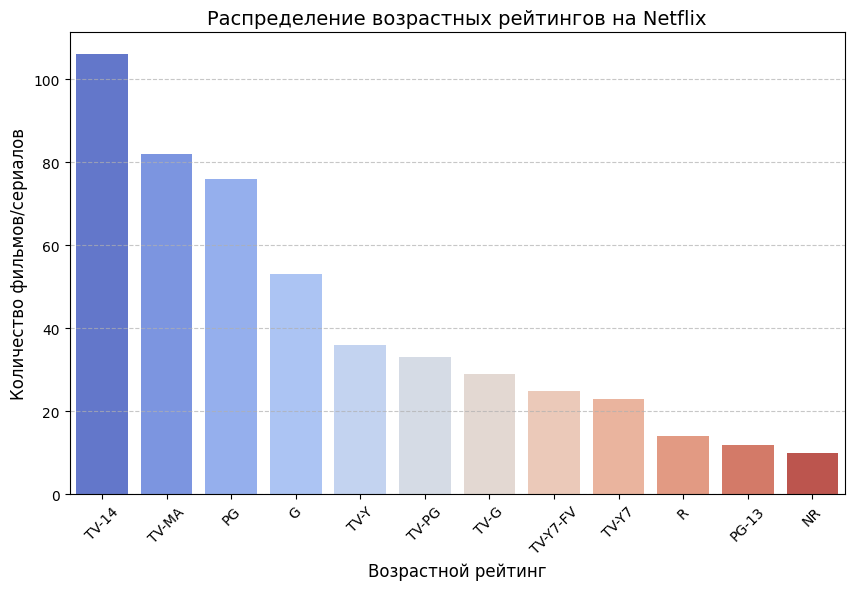

In [ ]:
rating_counts = df["rating"].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="coolwarm")

plt.title("Распределение возрастных рейтингов на Netflix", fontsize=14)
plt.xlabel("Возрастной рейтинг", fontsize=12)
plt.ylabel("Количество фильмов/сериалов", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

<ipython-input-64-20291b15e347>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




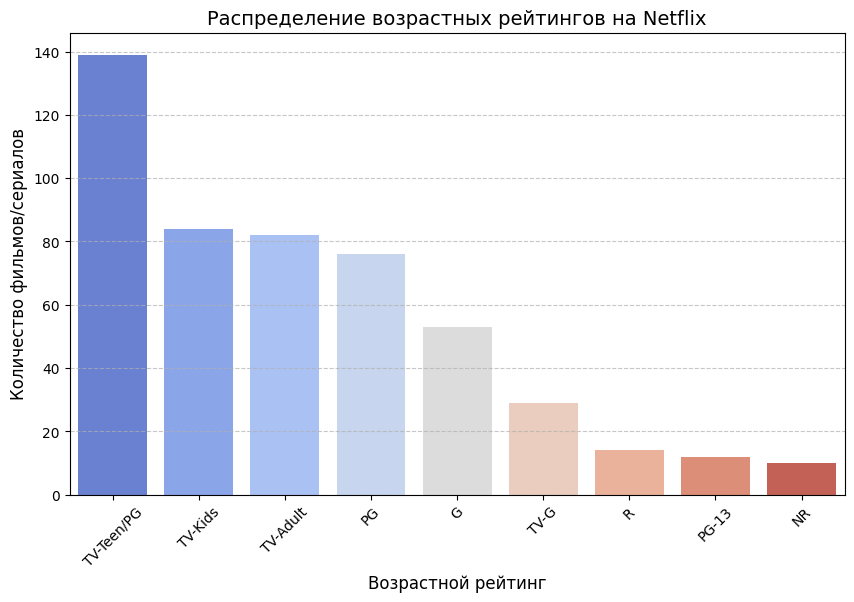

In [ ]:
rating_counts1 = df_copy["rating_cleaned"].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts1.index, y=rating_counts1.values, palette="coolwarm")

plt.title("Распределение возрастных рейтингов на Netflix", fontsize=14)
plt.xlabel("Возрастной рейтинг", fontsize=12)
plt.ylabel("Количество фильмов/сериалов", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

#### **Средняя оценка user rating score по категориям рейтинга**

In [ ]:
rating_scores = rating_scores.reset_index()

NameError: name 'rating_scores' is not defined

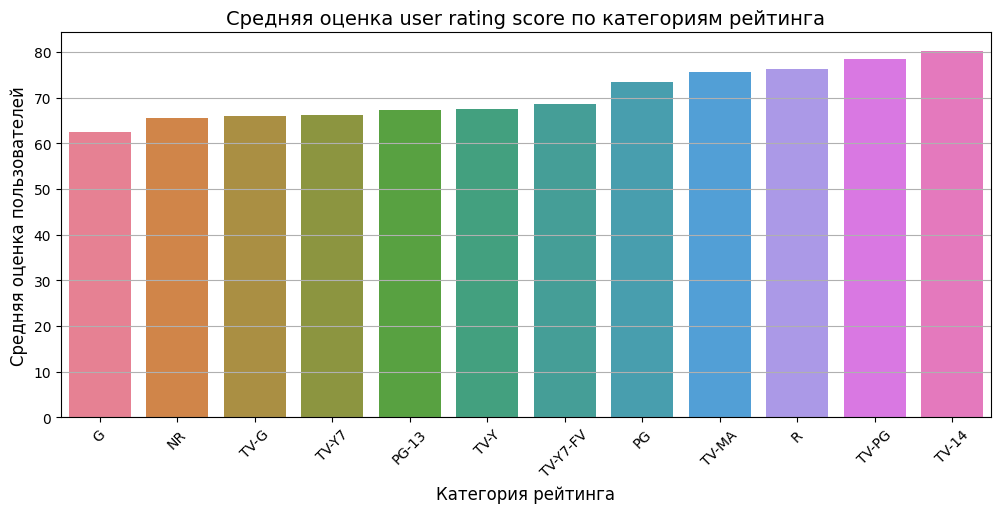

In [ ]:
plt.figure(figsize=(12, 5))
sns.barplot(data=rating_scores, x='rating', y='user rating score', hue='rating', dodge=False)
plt.title("Средняя оценка user rating score по категориям рейтинга", fontsize=14)
plt.xlabel("Категория рейтинга", fontsize=12)
plt.ylabel("Средняя оценка пользователей", fontsize=12)
plt.xticks(rotation=45)
plt.legend([], [], frameon=False)
plt.grid(axis='y')
plt.show()

#### Доля возрастных рейтингов по годам

#### **Распределение рейтингов по возрастным категориям**

<ipython-input-22-2536e413cd2e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="rating", y="user rating score", palette="coolwarm")


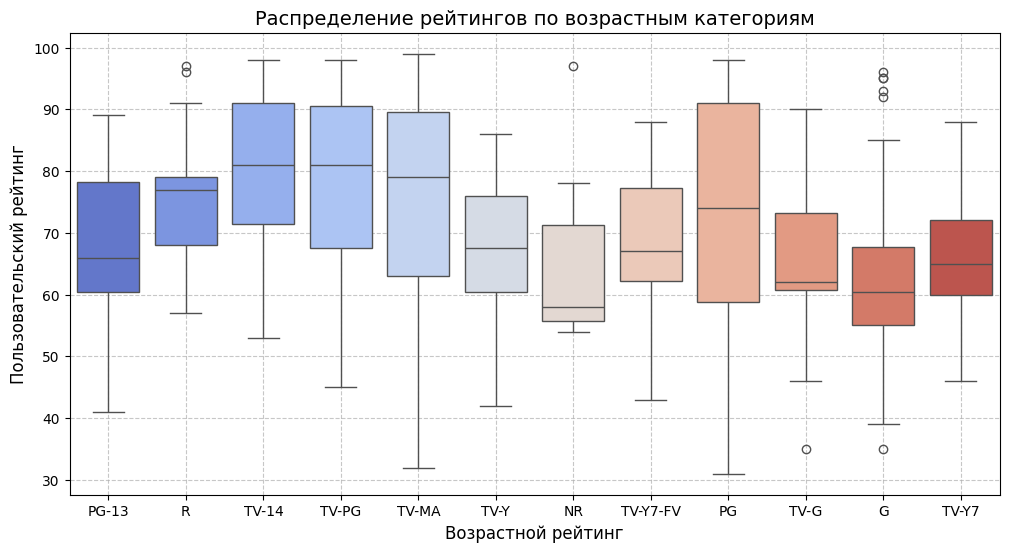

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="rating", y="user rating score", palette="coolwarm")

plt.title("Распределение рейтингов по возрастным категориям", fontsize=14)
plt.xlabel("Возрастной рейтинг", fontsize=12)
plt.ylabel("Пользовательский рейтинг", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)

plt.show()

#### **Определение идеального возрастного рейтинга с точки зрения популярности**

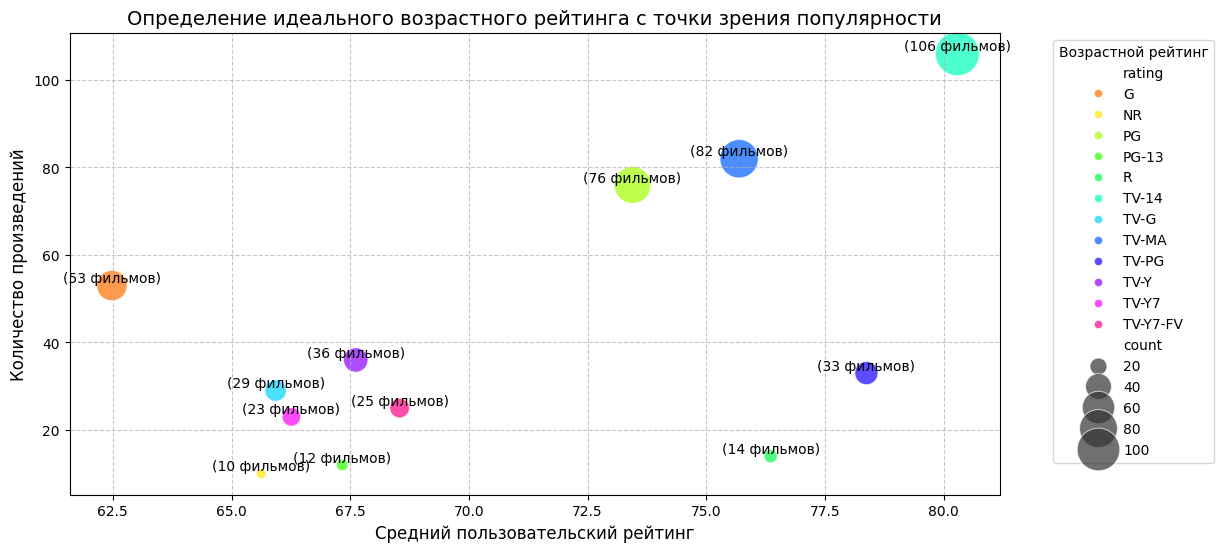

In [ ]:
popularity_data = df.groupby("rating").agg({"user rating score": "mean", "title": "count"})
popularity_data.rename(columns={"title": "count"}, inplace=True)

plt.figure(figsize=(12, 6))
ax = sns.scatterplot(data=popularity_data, x="user rating score", y="count", size="count", hue=popularity_data.index, palette="hsv", alpha=0.7, sizes=(50, 1000))

for index, row in popularity_data.iterrows():
    ax.text(row["user rating score"], row["count"], f'({int(row["count"])} фильмов)', ha='center', va='bottom', fontsize=10)

plt.title("Определение идеального возрастного рейтинга с точки зрения популярности", fontsize=14)
plt.xlabel("Средний пользовательский рейтинг", fontsize=12)
plt.ylabel("Количество произведений", fontsize=12)
plt.legend(title="Возрастной рейтинг", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

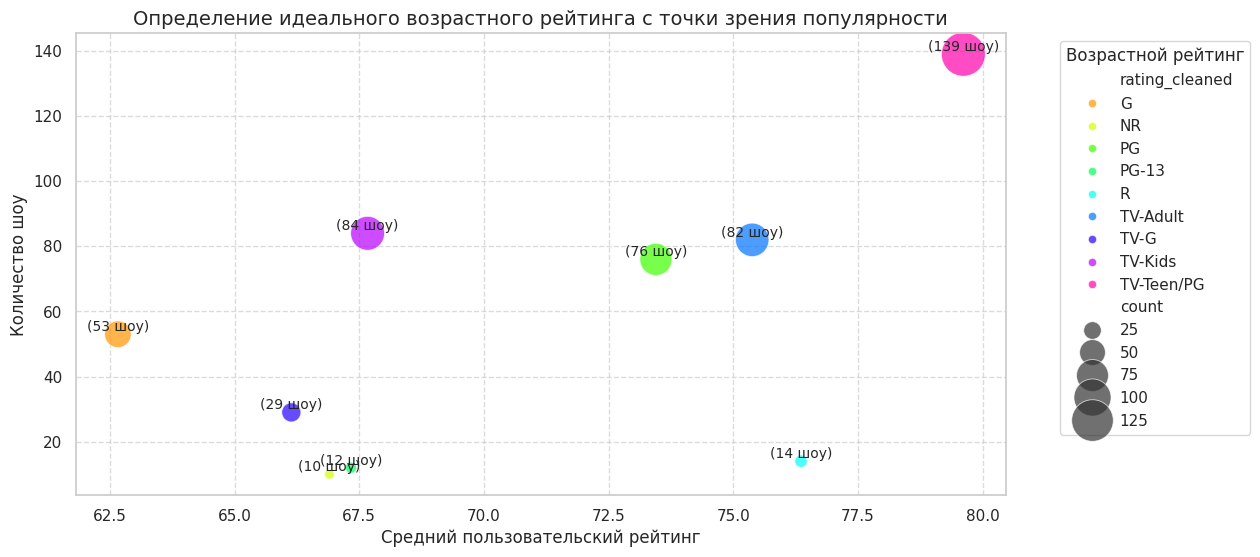

In [ ]:
popularity_data_cleaned = df_copy.groupby("rating_cleaned").agg({"user rating score": "mean", "title": "count"})
popularity_data_cleaned.rename(columns={"title": "count"}, inplace=True)

plt.figure(figsize=(12, 6))
ax = sns.scatterplot(
    data=popularity_data_cleaned,
    x="user rating score",
    y="count",
    size="count",
    hue=popularity_data_cleaned.index,
    palette="hsv",
    alpha=0.7,
    sizes=(50, 1000)
)

for index, row in popularity_data_cleaned.iterrows():
    ax.text(row["user rating score"], row["count"], f'({int(row["count"])} шоу)',
            ha='center', va='bottom', fontsize=10)

plt.title("Определение идеального возрастного рейтинга с точки зрения популярности", fontsize=14)
plt.xlabel("Средний пользовательский рейтинг", fontsize=12)
plt.ylabel("Количество шоу", fontsize=12)
plt.legend(title="Возрастной рейтинг", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

<Figure size 1600x800 with 0 Axes>

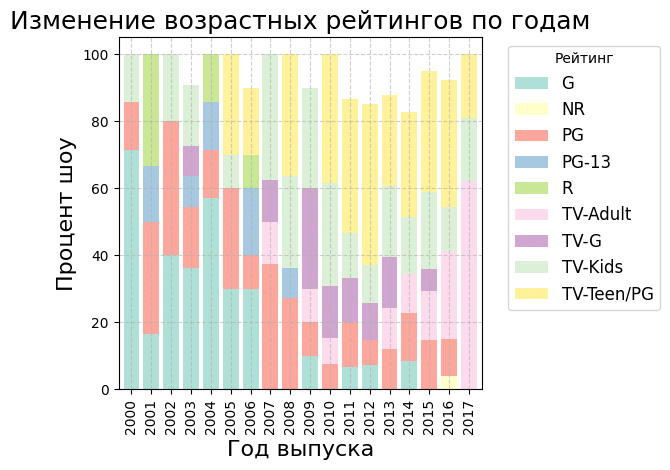

In [ ]:
df_copy = df.copy()

rating_mapping = {
    'TV-Y': 'TV-Kids',
    'TV-Y7': 'TV-Kids',
    'TV-Y7-FV': 'TV-Kids',
    'TV-PG': 'TV-Teen/PG',
    'TV-14': 'TV-Teen/PG',
    'TV-MA': 'TV-Adult',
    'TV-G': 'TV-G',
    'NR': 'NR',
    'G': 'G',
    'PG': 'PG',
    'PG-13': 'PG-13',
    'R': 'R'
}

df_copy['rating_cleaned'] = df_copy['rating'].replace(rating_mapping)

df_filtered = df_copy[df_copy['release year'] >= 2000]

rating_per_year = df_filtered.groupby(["release year", "rating_cleaned"])["title"].count().unstack().fillna(0)

rating_per_year_pct = rating_per_year.div(rating_per_year.sum(axis=1), axis=0) * 100

top_categories_per_year = rating_per_year_pct.apply(lambda x: x.nlargest(5), axis=1)

plt.figure(figsize=(16, 8))
top_categories_per_year.plot(kind="bar", stacked=True, colormap="Set3", alpha=0.7, width=0.8)
plt.xlabel("Год выпуска", fontsize=16)
plt.ylabel("Процент шоу", fontsize=16)
plt.title("Изменение возрастных рейтингов по годам", fontsize=18)
plt.legend(title="Рейтинг", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
import plotly.graph_objects as go

df_copy = df.copy()

rating_mapping = {
    'TV-Y': 'TV-Kids',
    'TV-Y7': 'TV-Kids',
    'TV-Y7-FV': 'TV-Kids',
    'TV-PG': 'TV-Teen/PG',
    'TV-14': 'TV-Teen/PG',
    'TV-MA': 'TV-Adult',
    'TV-G': 'TV-G',
    'NR': 'NR',
    'G': 'G',
    'PG': 'PG',
    'PG-13': 'PG-13',
    'R': 'R'
}

df_copy['rating_cleaned'] = df_copy['rating'].replace(rating_mapping)

df_filtered = df_copy[df_copy['release year'] >= 2000]

rating_per_year = df_filtered.groupby(["release year", "rating_cleaned"])["title"].count().unstack().fillna(0)

rating_per_year_pct = rating_per_year.div(rating_per_year.sum(axis=1), axis=0) * 100

top_categories_per_year = rating_per_year_pct.apply(lambda x: x.nlargest(5), axis=1)

years = top_categories_per_year.index
categories = top_categories_per_year.columns

traces = []
for category in categories:
    traces.append(go.Bar(
        x=years,
        y=top_categories_per_year[category],
        name=category,
        hoverinfo='x+y+name',
    ))


fig = go.Figure(traces)

fig.update_layout(
    barmode='stack',
    title="Изменение возрастных рейтингов по годам (Топ 5 категорий, начиная с 2000 года)",
    xaxis_title="Год выпуска",
    yaxis_title="Процент шоу",
    legend_title="Рейтинг",
    xaxis=dict(tickmode='linear'),
    template="plotly",
    width=1000,
    height=600
)

fig.update_layout(
    xaxis_tickangle=-45,
    showlegend=True,
)

fig.show()

In [ ]:
from google.colab import files
files.download("plot.png")

FileNotFoundError: Cannot find file: plot.png

### **Есть ли взаимосвязи между категорией рейтинга (rating), пользовательской оценкой (user rating score) и годом выпуска (release year)?**

In [ ]:
pivot_table_detailed = df_filtered.pivot_table(
    values='user rating score',
    index='release year',
    columns='rating_cleaned',
    aggfunc='mean'
)

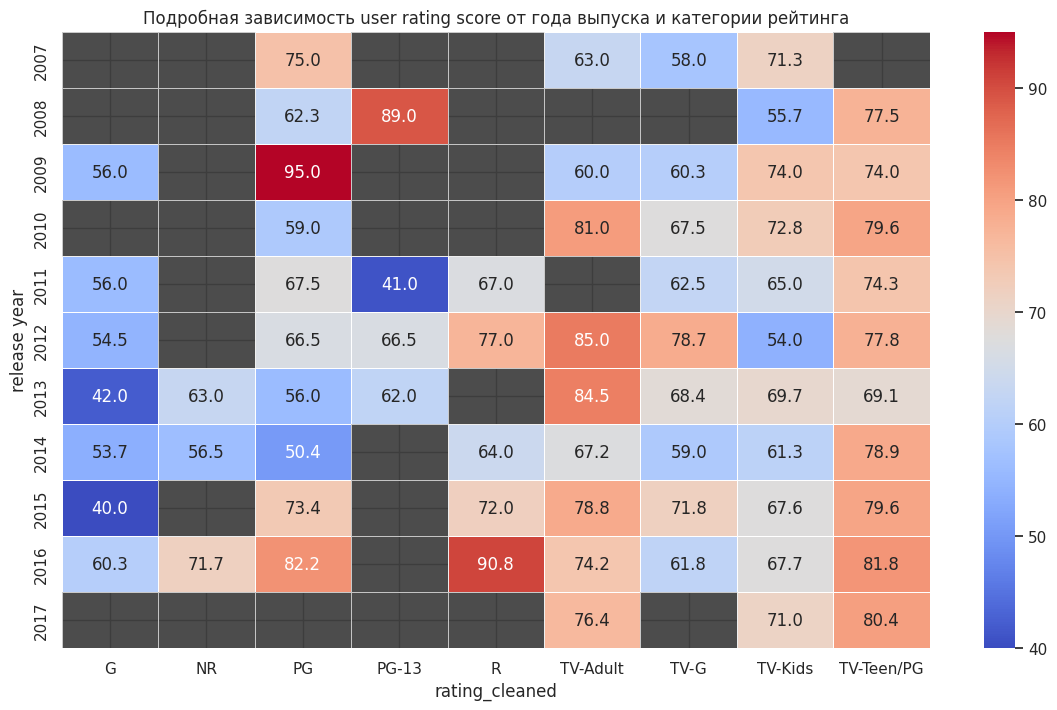

In [ ]:
mask = pivot_table_detailed.isnull()

plt.figure(figsize=(14, 8))
sns.heatmap(
    pivot_table_detailed,
    cmap='coolwarm',
    annot=True,
    mask=mask,
    fmt=".1f",
    linewidths=0.5)
plt.title("Подробная зависимость user rating score от года выпуска и категории рейтинга")
plt.xlabel("Категория рейтинга")
plt.ylabel("Год выпуска")

sns.heatmap(
    pivot_table_detailed.isnull(),
    mask=~mask,
    cmap="gray",
    alpha=0.7,
    linewidths=0.5,
    cbar=False,
)

plt.show()

In [ ]:
rating_correlation = df_copy.groupby('rating_cleaned')['user rating score'].mean()
print(rating_correlation.sort_values(ascending=False))

rating_cleaned
TV-Teen/PG    79.611511
R             76.357143
TV-Adult      75.378049
PG            73.447368
TV-Kids       67.666667
PG-13         67.333333
NR            66.900000
TV-G          66.137931
G             62.660377
Name: user rating score, dtype: float64


In [ ]:
tv_adult_count = df_copy[df_copy['rating_cleaned'] == 'TV-Teen/PG'].groupby('release year').size()

adult_correlation = tv_adult_count.corr(correlation_data['user rating score'])
print(f"Корреляция между количеством контента и средней оценкой: {adult_correlation:.2f}")

Корреляция между количеством контента и средней оценкой: 0.36


In [ ]:
selected_categories = ["TV-Teen/PG", "TV-Kids", "G", "TV-Adult", "PG"]

category_correlations_filtered = {}

correlation_data = df_copy.groupby('release year').agg({'user rating score': 'mean'})

for category in selected_categories:
    if category in df_copy['rating_cleaned'].unique():

        category_count = df_copy[df_copy['rating_cleaned'] == category].groupby('release year').size()


        correlation = category_count.corr(correlation_data['user rating score'])


        category_correlations_filtered[category] = correlation

category_correlation_df_filtered = pd.DataFrame.from_dict(category_correlations_filtered, orient='index', columns=['Correlation'])

category_correlation_df_filtered_sorted = category_correlation_df_filtered.sort_values(by='Correlation', ascending=False)
category_correlation_df_filtered_sorted

,Correlation
TV-Adult,0.665555
G,0.363804
TV-Teen/PG,0.362906
TV-Kids,0.253209
PG,0.175784


<ipython-input-119-b516e6e7a619>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




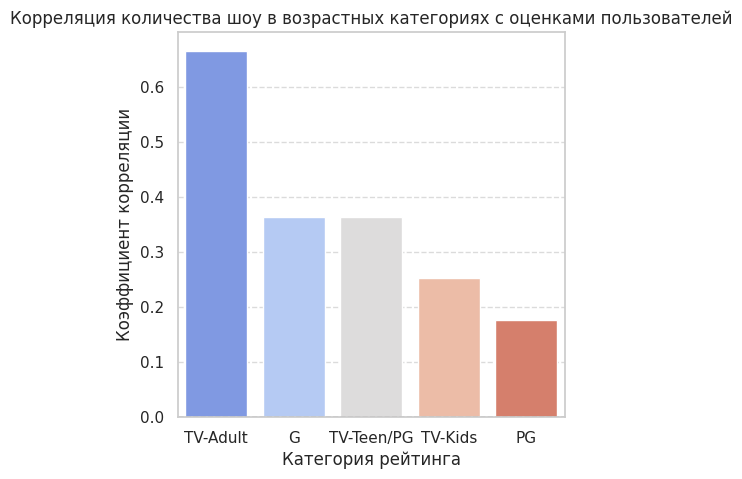

In [ ]:
# Визуализация корреляции с помощью barplot
plt.figure(figsize=(5, 5))
sns.barplot(
    x=category_correlation_df_filtered_sorted.index,
    y=category_correlation_df_filtered_sorted['Correlation'],
    palette="coolwarm"
)

# Настройки графика
plt.title("Корреляция количества шоу в возрастных категориях с оценками пользователей")
plt.xlabel("Категория рейтинга")
plt.ylabel("Коэффициент корреляции")
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Линия для 0
plt.grid(axis='y', linestyle="--", alpha=0.7)

# Показать график
plt.show()

### Pairs plot

Ну и, наконец, построим Pairs Plot. Pairs Plot — это мощный исследовательский инструмент, который позволяет взглянуть на взаимосвязи сразу между несколькими признаками, а также на их совместные парные распределения.

В примере ниже при построении использовался модуль seaborn и функция PairGrid. Построен Pairs Plot был со scatterplots выше главной диагонали, гистограммами на главной диагонали и 2D kernel density plots, с указанием корреляции, ниже главной диагонали.

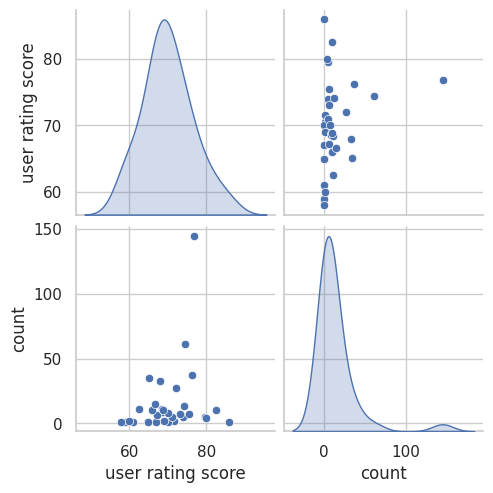

In [ ]:
# Группируем данные по году выпуска, среднему рейтингу пользователей и количеству шоу
correlation_data = df_copy.groupby('release year').agg({'user rating score': 'mean', 'title': 'count'})
correlation_data.rename(columns={'title': 'count'}, inplace=True)

# Проверяем типы данных и преобразуем их в float, если необходимо
correlation_data = correlation_data.astype(float)

# Создаём pairplot для выявления зависимостей между переменными
sns.pairplot(correlation_data, diag_kind="kde")

# Показываем график
plt.show()

## 4. **Feature Engineering**

Будем работать с историей ratingLevel: в них написано краткое описание что есть в фильме, оно соответсвует rating. Будем вычленять из них основные слова для того чтобы было легче интерпритуемо и потом лешче с этим столбцом работать, потому что сейчас в ratingLevel у нас много лишних слов и нету единного формата

Цель
- Преобразовать описания в столбце `ratingLevel` в **короткие ключевые фразы или теги**, чтобы упростить дальнейший анализ данных.
- Устранить избыточность, стандартизировать формулировки и выделить только **основные элементы**.

Задачи
1. **Предобработка текста**:
   - Приведение текста к стандартному виду (удаление лишних символов, приведение к нижнему регистру, токенизация).
2. **Выделение ключевых слов**:
   - Анализ часто встречающихся слов для выявления основных тем, таких как `violence`, `humor`, `language`, `scary`.
3. **Создание тэгов**:
   - Сопоставление описаний с предопределёнными категориями, чтобы стандартизировать текст в удобном формате.
4. **Стандартизация**:
   - Преобразование текста в чёткие и лаконичные фразы, отражающие основные аспекты фильма.

Ожидаемый результат

После выполнения преобразований:
- Столбец `ratingLevel` будет стандартизирован, что облегчит его интерпретацию.
- Будет создан новый столбец `tags` с ключевыми категориями, например:
  - "violence, language".
  - "humor, scary".
  - "drugs, sexual".


In [ ]:
import numpy as np
np.unique(df['ratingLevel'])
#выделили все уникальные значения в ratingLevel

array(['Designed for children of all ages. Suitable for all children.',
       'General Audiences. Suitable for all ages.',
       'General audience. Suitable for all ages.',
       'Mature audience only. May not be suitable for ages under 17.',
       'Not Rated. This movie has not been rated officially.',
       'Parental guidance suggested. May not be suitable for children under 10.',
       'Parental guidance suggested. May not be suitable for younger children.',
       'Parents strongly cautioned. May be unsuitable for children under 14.',
       'Parents strongly cautioned. Some material may be inappropriate for children under 13.',
       'Restricted. Under 17 requires accompanying parent or adult guardian.',
       'Suitable for children ages 7 and older.',
       'Suitable for children ages 7 and older. Contains fantasy violence.'],
      dtype=object)

1. Первым шагом будет выделение основных категорий или ключевых слов, которые описывают содержание рейтингов.                 
**Например:**

"Violence": упоминание насилия.
"Sexual content": сексуальный контент.
"Language": ненормативная лексика.
"Drug use": употребление наркотиков.
"Humor": наличие шуток или грубого юмора.
"Fantasy action": фантастический экшен.
"Scary": пугающие моменты.

2. Предобработка текста
Необходимо очистить текст от лишних элементов и привести его к стандартному виду:

Приведение текста к нижнему регистру.
Удаление знаков препинания.
Токенизация (разделение текста на отдельные слова).
Удаление стоп-слов (например, "and", "for", "with" и т.д.).
Нормализация ключевых фраз.

In [ ]:
import nltk

# Загрузка ресурса стоп-слов
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import re
from nltk.corpus import stopwords

# Инициализация стоп-слов один раз
stop_words = set(stopwords.words('english'))

# Функция предобработки текста
def preprocess_text(text):
    # Удаляем знаки препинания, приводим к нижнему регистру и удаляем стоп-слова
    text = re.sub(r'[^\w\s]', '', text.lower())  # Убираем знаки препинания и приводим к нижнему регистру
    tokens = [word for word in text.split() if word not in stop_words]  # Удаляем стоп-слова
    return ' '.join(tokens)

# Применяем предобработку к столбцу
df['ratingLevel_cleaned'] = df['ratingLevel'].apply(preprocess_text)

3. Выделение ключевых слов
Для упрощения описания можно выделить ключевые слова, которые часто встречаются. Это можно сделать с помощью:

Частотного анализа (TF-IDF).
Поиска самых часто встречающихся слов.

In [ ]:
from collections import Counter

# Выделение всех слов из столбца
all_words = ' '.join(df['ratingLevel_cleaned']).split()
word_counts = Counter(all_words)

# Топ-20 самых частых слов
print(word_counts.most_common(20))

[('suitable', 344), ('children', 338), ('may', 298), ('ages', 236), ('parents', 115), ('strongly', 115), ('cautioned', 115), ('parental', 108), ('guidance', 108), ('suggested', 108), ('unsuitable', 103), ('14', 103), ('audience', 103), ('17', 89), ('general', 80), ('10', 76), ('mature', 75), ('audiences', 52), ('7', 47), ('older', 47)]


Частотный анализ показал, что ключевые слова, такие как violence, language, children, встречаются часто, что подтверждает их значимость для выделенных категорий.
Это помогает точнее настроить категории и ключевые слова.

4. Создание тэгов
После выделения ключевых слов можно создать новую колонку с тэгами, которые упростят интерпретацию:

Определить список категорий (например, ["violence", "language", "sexual", "humor", "scary", "drugs"]).
Для каждой записи в столбце ratingLevel проверить, содержит ли она ключевые слова из категорий.

### **Объяснение категорий**

**1. Children**
- **Ключевые слова**: `ages`, `children`, `suitable`, `general`, `7`, `older`.
- **Описание**: Эта категория включает фильмы и контент, который подходит для детей. Обычно это семейные фильмы или анимационные проекты с минимальным количеством насилия или других неподходящих тем.
- **Примеры**: мультфильмы, обучающие видео, сказки.


**2. Violence**
- **Ключевые слова**: `violence`, `mature`, `menacing`, `intense`, `scary`.
- **Описание**: Фильмы с элементами насилия, угрозы или пугающих сцен. Это могут быть боевики, триллеры, ужасы или фильмы с напряжённым сюжетом.
- **Примеры**: экшен-фильмы, военные драмы, фильмы ужасов.

**3. Language**
- **Ключевые слова**: `language`, `dialogue`, `crude`.
- **Описание**: Фильмы с ненормативной лексикой или грубыми выражениями. Обычно такие фильмы подходят для более зрелой аудитории.
- **Примеры**: драмы, криминальные фильмы, фильмы для взрослых с интенсивным диалогом.

**4. Parental Guidance**
- **Ключевые слова**: `parental`, `guidance`, `suggested`, `parents`, `cautioned`.
- **Описание**: Фильмы, которые могут содержать элементы, требующие пояснений от родителей, такие как сложные темы или умеренные элементы насилия и языка.
- **Примеры**: семейные драмы, фильмы с моральными уроками.

**5. Mature Themes**
- **Ключевые слова**: `mature`, `17`, `18`, `strongly`, `unsuitable`.
- **Описание**: Контент, предназначенный для взрослых зрителей. Такие фильмы могут включать сложные темы, насилие, сексуальный контент или сильный эмоциональный подтекст.
- **Примеры**: драмы, психологические триллеры.


**6. Fantasy/Action**
- **Ключевые слова**: `fantasy`, `action`, `adventure`, `martial`, `sequences`.
- **Описание**: Жанр, включающий элементы фантастики, приключений и экшена. Это могут быть фильмы о супергероях, фэнтези-эпопеи, приключенческие фильмы.
- **Примеры**: "Властелин колец", "Мстители".


**7. Humor**
- **Ключевые слова**: `humor`, `rude`, `comic`, `suggestive`.
- **Описание**: Комедийные фильмы, включая грубый, саркастический или комический юмор. Подходит для зрителей, которые любят лёгкие и забавные сюжеты.
- **Примеры**: ситкомы, комедии.


**8. Drugs/Alcohol**
- **Ключевые слова**: `drugs`, `drug`, `alcohol`, `substance`.
- **Описание**: Фильмы, которые упоминают или показывают употребление наркотиков или алкоголя. Это могут быть драмы, документальные фильмы или криминальные фильмы.
- **Примеры**: фильмы о борьбе с зависимостями, криминальные триллеры.


**9. Sexual Content**
- **Ключевые слова**: `sexual`, `nudity`, `sex`, `intimate`.
- **Описание**: Фильмы с сексуальным контентом или откровенными сценами. Такие фильмы чаще всего предназначены для взрослых зрителей.
- **Примеры**: романтические драмы, артхаусное кино.


**10. Thematic Elements**
- **Ключевые слова**: `thematic`, `elements`, `material`, `themes`.
- **Описание**: Фильмы, поднимающие сложные темы или содержащие глубокие моральные, философские или эмоциональные аспекты.
- **Примеры**: биографические фильмы, исторические драмы, социальные триллеры.


In [ ]:
# Определяем расширенные категории
categories = {
    'Children': ['ages', 'children', 'suitable', 'general', '7', 'older'],
    'Violence': ['violence', 'mature', 'menacing', 'intense', 'scary'],
    'Language': ['language', 'dialogue', 'crude'],
    'Parental Guidance': ['parental', 'guidance', 'suggested', 'parents', 'cautioned'],
    'Mature Themes': ['mature', '17', '18', 'strongly', 'unsuitable'],
    'Fantasy/Action': ['fantasy', 'action', 'adventure', 'martial', 'sequences'],
    'Humor': ['humor', 'rude', 'comic', 'suggestive'],
    'Drugs/Alcohol': ['drugs', 'drug', 'alcohol', 'substance'],
    'Sexual Content': ['sexual', 'nudity', 'sex', 'intimate'],
    'Thematic Elements': ['thematic', 'elements', 'material', 'themes']
}

# Функция для создания тегов
def assign_tags(text):
    tags = []
    for category, keywords in categories.items():
        if any(word in text for word in keywords):
            tags.append(category)
    return ', '.join(tags)

# Применяем функцию к очищенному тексту
df['tags'] = df['ratingLevel_cleaned'].apply(assign_tags)

# Проверяем результат
print(df[['ratingLevel', 'tags']].head(10))


                                         ratingLevel  \
0  Parents strongly cautioned. Some material may ...   
1  Restricted. Under 17 requires accompanying par...   
2  Parents strongly cautioned. May be unsuitable ...   
3  Parents strongly cautioned. May be unsuitable ...   
4  Parental guidance suggested. May not be suitab...   
5  Parents strongly cautioned. May be unsuitable ...   
6  Mature audience only. May not be suitable for ...   
7  Parents strongly cautioned. May be unsuitable ...   
8  Mature audience only. May not be suitable for ...   
9  Parents strongly cautioned. May be unsuitable ...   

                                                tags  
0  Children, Parental Guidance, Mature Themes, Th...  
1                            Children, Mature Themes  
2         Children, Parental Guidance, Mature Themes  
3         Children, Parental Guidance, Mature Themes  
4                        Children, Parental Guidance  
5         Children, Parental Guidance, Mature Themes 

In [ ]:
df.drop(columns=['ratingLevel_cleaned'], inplace=True)

Столбец ratingLevel_cleaned, использовавшийся для промежуточной обработки текста, был успешно удалён.

Подход к устранению конфликтов в тегах
Иерархия категорий:

Зададим приоритетность тегов. Например:
Если присутствует Mature Themes или Violence, удаляем Children.
Если есть Drugs/Alcohol или Sexual Content, удаляем Children.
Логика фильтрации:

После первоначального присвоения тегов проверяем комбинации тегов на наличие конфликтов.
Убираем несоответствующие теги в соответствии с заданной иерархией.

In [ ]:
# Функция для фильтрации конфликтных тегов
def filter_conflicting_tags(tags):
    # Разбиваем строку с тегами на список
    tags = tags.split(', ')

    # Если есть Mature Themes или Violence, удаляем Children
    if 'Mature Themes' in tags or 'Violence' in tags:
        tags = [tag for tag in tags if tag != 'Children']

    # Если есть Drugs/Alcohol или Sexual Content, удаляем Children
    if 'Drugs/Alcohol' in tags or 'Sexual Content' in tags:
        tags = [tag for tag in tags if tag != 'Children']

    # Возвращаем отфильтрованные теги в виде строки
    return ', '.join(tags)

# Применяем фильтрацию конфликтных тегов к столбцу
df['tags'] = df['tags'].apply(filter_conflicting_tags)

# Проверяем результат
print(df[['ratingLevel', 'tags']].head(10))


                                         ratingLevel  \
0  Parents strongly cautioned. Some material may ...   
1  Restricted. Under 17 requires accompanying par...   
2  Parents strongly cautioned. May be unsuitable ...   
3  Parents strongly cautioned. May be unsuitable ...   
4  Parental guidance suggested. May not be suitab...   
5  Parents strongly cautioned. May be unsuitable ...   
6  Mature audience only. May not be suitable for ...   
7  Parents strongly cautioned. May be unsuitable ...   
8  Mature audience only. May not be suitable for ...   
9  Parents strongly cautioned. May be unsuitable ...   

                                                tags  
0  Parental Guidance, Mature Themes, Thematic Ele...  
1                                      Mature Themes  
2                   Parental Guidance, Mature Themes  
3                   Parental Guidance, Mature Themes  
4                        Children, Parental Guidance  
5                   Parental Guidance, Mature Themes 

In [ ]:
df.head(40)

,title,rating,ratingLevel,release year,user rating score,tags
0,White Chicks,PG-13,Parents strongly cautioned. Some material may ...,2004,82.0,"Parental Guidance, Mature Themes, Thematic Ele..."
1,Lucky Number Slevin,R,Restricted. Under 17 requires accompanying par...,2006,77.0,Mature Themes
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0,"Parental Guidance, Mature Themes"
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0,"Parental Guidance, Mature Themes"
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0,"Children, Parental Guidance"
5,Supernatural,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,95.0,"Parental Guidance, Mature Themes"
6,Breaking Bad,TV-MA,Mature audience only. May not be suitable for ...,2013,97.0,"Violence, Mature Themes"
7,The Vampire Diaries,TV-14,Parents strongly cautioned. May be unsuitable ...,2017,91.0,"Parental Guidance, Mature Themes"
8,The Walking Dead,TV-MA,Mature audience only. May not be suitable for ...,2015,98.0,"Violence, Mature Themes"
9,Pretty Little Liars,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,96.0,"Parental Guidance, Mature Themes"


### **Результаты**

**Структурированный столбец `tags`**
- Теперь каждая запись содержит **ключевые категории**, описывающие характеристики фильмов.
- Эти данные пригодны для **анализа** и **визуализации**.


**Упрощение данных**
- Сложные описания в `ratingLevel` были сведены к понятным категориям.
- Новый столбец `tags` предоставляет **стандартизированную интерпретацию** характеристик фильмов.


**Готовность к дальнейшему анализу**
- Итоговые данные можно использовать для:
  - Построения **визуализаций** (например, распределения категорий по фильмам).
  - Анализа **зависимостей** между тегами и другими характеристиками (например, возрастные ограничения, пользовательские оценки).
  - Разработки **моделей машинного обучения** (предсказания характеристик фильмов, популярности и т.д.).



Займемся анализом нашего нового столбца tags

In [ ]:
# Создаем копию DataFrame
df_copy = df.copy()

# Проверяем копию
df_copy.head()

,title,rating,ratingLevel,release year,user rating score,tags
0,White Chicks,PG-13,Parents strongly cautioned. Some material may ...,2004,82.0,"Parental Guidance, Mature Themes, Thematic Ele..."
1,Lucky Number Slevin,R,Restricted. Under 17 requires accompanying par...,2006,77.0,Mature Themes
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0,"Parental Guidance, Mature Themes"
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0,"Parental Guidance, Mature Themes"
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0,"Children, Parental Guidance"


In [ ]:
empty_tags = df_copy[df_copy['tags'].str.strip() == '']
print(f"Количество строк с пустыми значениями в tags: {len(empty_tags)}")



Количество строк с пустыми значениями в tags: 8


In [ ]:
df_copy['tags'] = df_copy['tags'].apply(lambda x: 'not specified' if x.strip() == '' else x)

empty_tags_after = df_copy[df_copy['tags'].str.strip() == '']
print(f"Количество строк с пустыми значениями после замены: {len(empty_tags_after)}")


Количество строк с пустыми значениями после замены: 0


Распределение значений в столбце tags

Топ-10 самых популярных комбинаций тегов:
tags
Children                                               137
Children, Parental Guidance                            108
Parental Guidance, Mature Themes                       103
Violence, Mature Themes                                 75
Violence, Fantasy/Action                                24
Mature Themes                                           14
Parental Guidance, Mature Themes, Thematic Elements     12
not specified                                            8
Name: count, dtype: int64


<Axes: title={'center': 'Топ-10 популярных комбинаций тегов'}, xlabel='tags'>

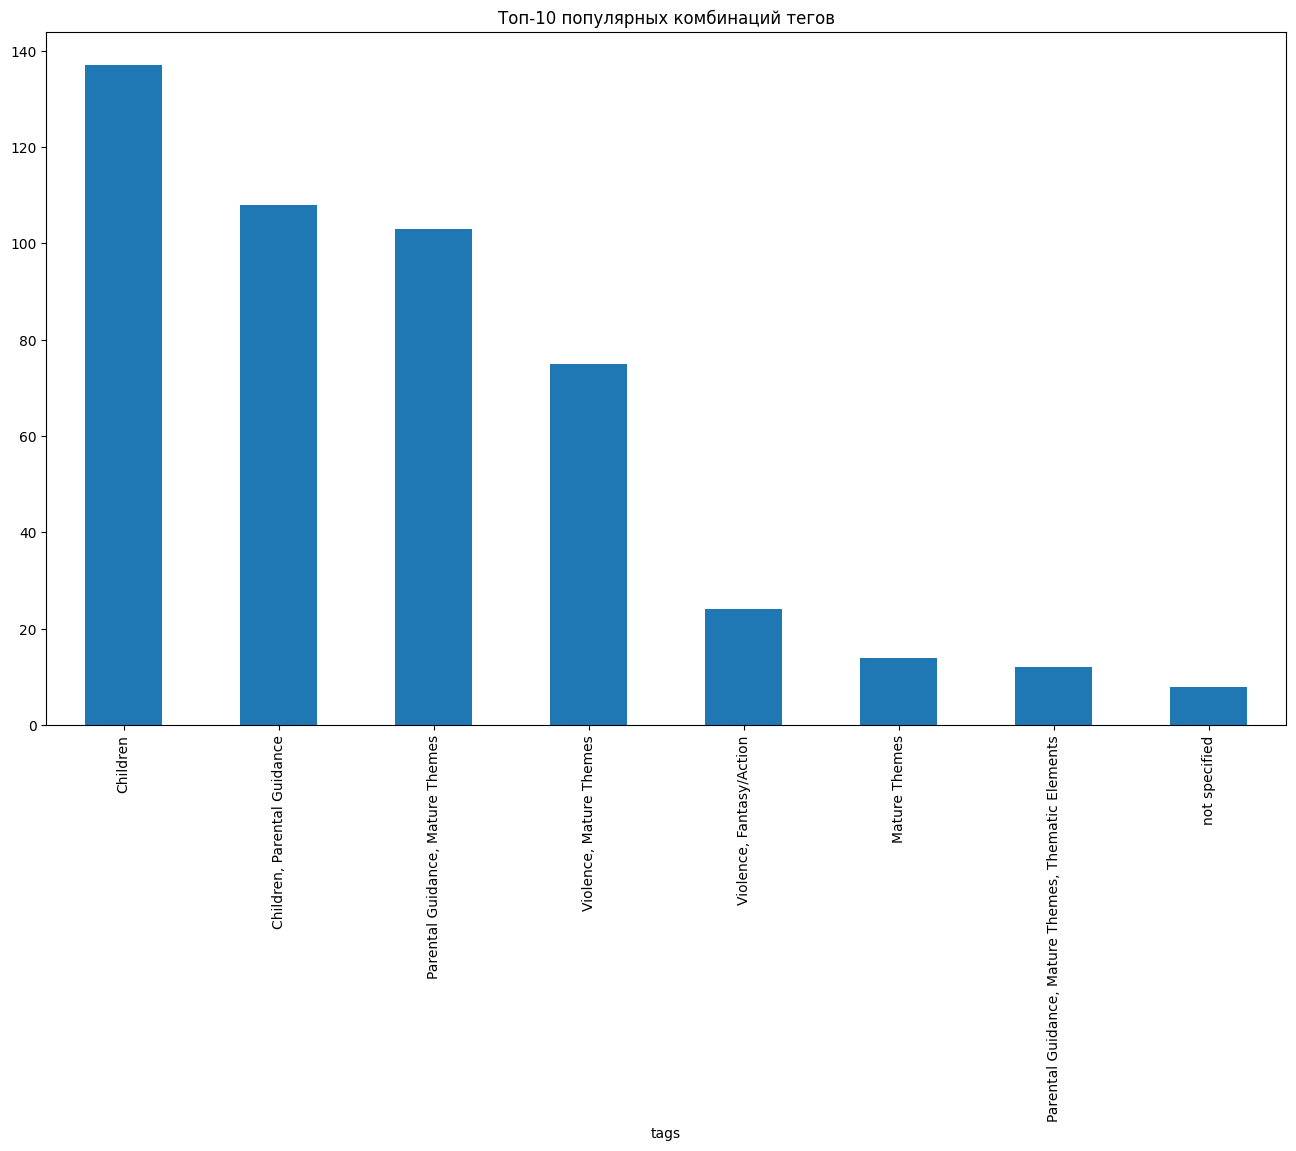

In [ ]:
tag_counts = df_copy['tags'].value_counts()

print("Топ-10 самых популярных комбинаций тегов:")
print(tag_counts.head(10))

tag_counts.head(10).plot(kind='bar', figsize=(16, 9), title="Топ-10 популярных комбинаций тегов")


Этот график отображает распределение самых популярных комбинаций тегов в контенте. Наибольшая популярность у комбинации тегов "Children", что указывает на высокий интерес к контенту, ориентированному на детей. Также выделяются такие комбинации, как "Children, Parental Guidance" и "Children, Parental Guidance, Mature Themes", что подтверждает интерес к фильмам для детей с ограничениями по возрасту и контенту для семейных зрителей.

Кроме того, комбинации тегов "Violence" и "Violence, Fantasy/Action" появляются реже, что может свидетельствовать о нишевом интересе к более интенсивным жанрам для взрослой аудитории.

Наличие комбинации "not specified" говорит о некоторой неопределенности или неточности в тегировании контента.

Вывод для бизнеса:
Основное внимание стоит уделить контенту для детей и семейных зрителей с родительским контролем.
Меньшее внимание можно уделить более нишевым категориям, таким как "Violence", для привлечения взрослой аудитории, предпочитающей более интенсивные и динамичные жанры.

Топ-10 самых частых категорий:
tags
Children             245
Parental Guidance    223
Mature Themes        204
Violence              99
Fantasy/Action        24
Thematic Elements     12
not specified          8
Name: count, dtype: int64


<Axes: title={'center': 'Топ-10 популярных категорий'}, xlabel='tags'>

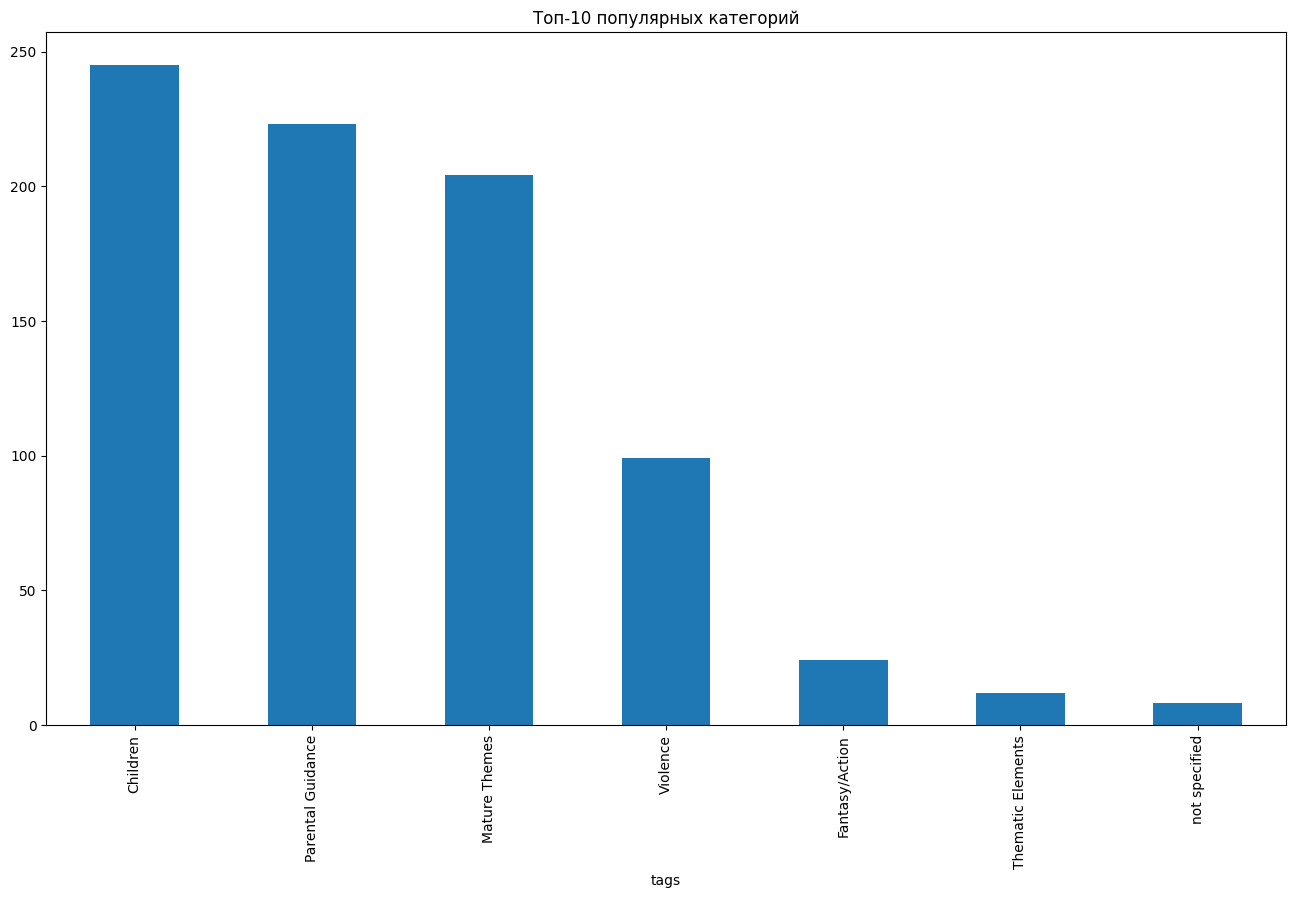

In [ ]:
from collections import Counter

all_tags = df_copy['tags'].str.split(', ').explode()
tag_frequency = all_tags.value_counts()

print("Топ-10 самых частых категорий:")
print(tag_frequency.head(10))

tag_frequency.head(10).plot(kind='bar', figsize=(16, 9), title="Топ-10 популярных категорий")

Анализ столбца tags выявил, что основная аудитория платформы делится на несколько ключевых групп. Контент для детей, представленный категорией "Children", доминирует, что подтверждает высокий интерес к семейным программам. За ним следуют категории, ориентированные на зрелую аудиторию: "Parental Guidance" и "Mature Themes", которые указывают на популярность фильмов с глубокой тематикой и сложными сюжетами. Категория "Violence" также занимает важное место, что подтверждает интерес к боевикам и триллерам.

Менее популярные, но значимые категории, такие как "Fantasy/Action", имеют потенциал для роста, ориентируясь на зрителей, увлекающихся приключенческими и фантастическими жанрами. Категория "not specified" может указывать на неопределенность интересов пользователей или недостаточную точность в классификации контента.

Для бизнеса это открывает следующие возможности:

Фокус на семейном контенте — создание и продвижение программ для детей с высокими стандартами безопасности и родительского контроля.
Разработка контента для взрослой аудитории — увеличение количества фильмов с серьёзными темами и глубокими сюжетами, ориентированных на зрелых зрителей.
Популяризация боевиков и триллеров — использование жанра "Violence" для создания динамичных и интенсивных сюжетов, удовлетворяющих интерес аудитории.
Развитие нишевых жанров — исследование и продвижение таких категорий, как "Fantasy/Action" и "Humor", для привлечения аудитории, заинтересованной в более специфичных жанрах.

Матрица корреляции категорий

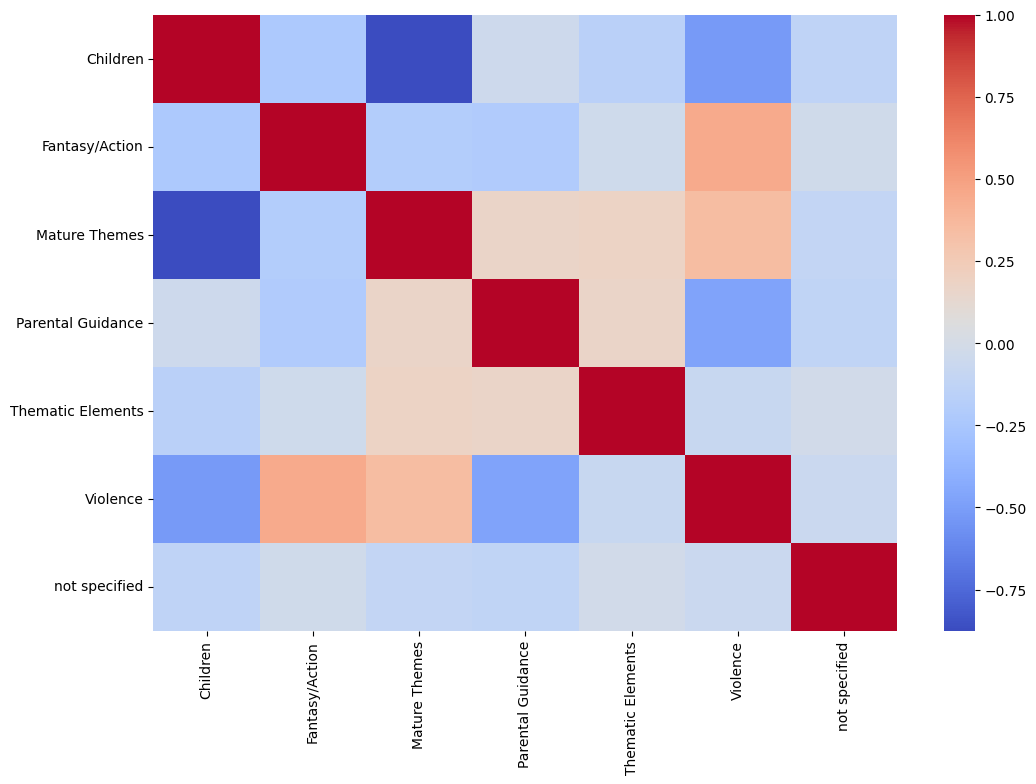

In [ ]:
# Создаём матрицу присутствия тегов
tag_matrix = df_copy['tags'].str.get_dummies(sep=', ')

# Рассчитываем корреляцию между тегами
tag_correlation = tag_matrix.corr()

# Визуализация корреляции
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(tag_correlation, cmap="coolwarm", annot=False)
plt.show()


Корреляционная матрица категорий тегов выявила несколько ключевых взаимосвязей. Ярко выраженная положительная корреляция между категориями "Parental Guidance" и "Mature Themes" говорит о том, что контент, который требует родительского контроля, часто включает сложные темы, ориентированные на более зрелую аудиторию. Сильная связь между "Fantasy/Action" и "Violence" свидетельствует о том, что боевики и фантастика часто включают элементы насилия, что соответствует интересам определённой возрастной категории зрителей.

Категория "Children" демонстрирует отрицательную корреляцию с "Violence" и "Mature Themes", что подтверждает чёткое разделение контента по возрастным категориям: контент для детей избегает насилия и сложных тем, ориентируясь на безопасный контент для более молодой аудитории.

Эти выводы позволяют бизнесу более точно сегментировать контент, что будет способствовать лучшему таргетированию рекламных кампаний, улучшению рекомендаций и созданию программ для различных зрительских групп.

In [ ]:
print(tag_matrix.columns)


Index(['Children', 'Fantasy/Action', 'Mature Themes', 'Parental Guidance',
       'Thematic Elements', 'Violence', 'not specified'],
      dtype='object')


In [ ]:
from scipy.ndimage import gaussian_filter1d
# Группируем по годам
tag_trends = tag_matrix.groupby('release year').sum()

# Срез данных с 1995 года
tag_trends_filtered = tag_trends.loc[1995:]

# Сглаживание трендов с шагом в 1 год
smoothed_trends_filtered = tag_trends_filtered.rolling(window=1, center=True, min_periods=1).mean()
smoothed_trends_filtered = smoothed_trends_filtered.apply(lambda x: gaussian_filter1d(x, sigma=2), axis=0)

# Находим топ-5 тегов
top_5_tags_filtered = smoothed_trends_filtered.sum().sort_values(ascending=False).head(5).index

# Визуализация с улучшенным масштабированием осей
plt.figure(figsize=(12, 6))
for tag in top_5_tags_filtered:
    plt.plot(smoothed_trends_filtered.index, smoothed_trends_filtered[tag], label=tag, linewidth=2)

plt.title('Популярность топ-5 тегов по годам (с 1995 года, сглаживание с шагом 1 год)')
plt.xlabel('Год выпуска')
plt.ylabel('Количество записей (улучшенный масштаб)')
plt.xticks(range(1995, tag_trends_filtered.index.max() + 1, 2))  # Шаг в 2 года для улучшенной читаемости
plt.legend(title='Теги', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

KeyError: 'release year'

In [ ]:
plt.figure(figsize=(12, 8))

# Построение area chart для популярных тегов
for tag in top_5_tags_filtered:
    plt.fill_between(smoothed_trends_filtered.index, smoothed_trends_filtered[tag], alpha=0.3, label=tag)

plt.title('Тренды популярности топ-5 тегов по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество записей')
plt.legend(title='Теги', loc='upper left')
plt.grid(True)
plt.show()

NameError: name 'top_5_tags_filtered' is not defined

<Figure size 1200x800 with 0 Axes>

График демонстрирует существенный рост интереса к контенту с начала 2000-х, с особенно выраженным увеличением популярности тегов, таких как "Mature Themes", что говорит о растущем спросе на фильмы для взрослой аудитории. Теги "Children" и "Parental Guidance" также показывают стабильный рост, подчеркивая важность семейного контента. В то же время, жанры с элементами экшена и фантастики, включая "Violence" и "Fantasy/Action", нарастают в популярности, что может быть связано с ростом интереса молодежной аудитории и успехом франшиз. До 2000 года наблюдается низкий интерес ко всем тегам, что может быть связано с меньшей диверсификацией контента в это время.
Для бизнеса это открывает такие возможности:

Семейный контент: Фокус на контенте для детей и с родительским контролем, чтобы привлечь молодую аудиторию и семьи.
Взрослый контент: Развитие контента с глубокими темами для взрослой аудитории.
Интенсивные жанры: Увеличение предложения боевиков и фантастики для молодежи.
Диверсификация: Эксперименты с жанрами и темами для привлечения разных зрительских сегментов.

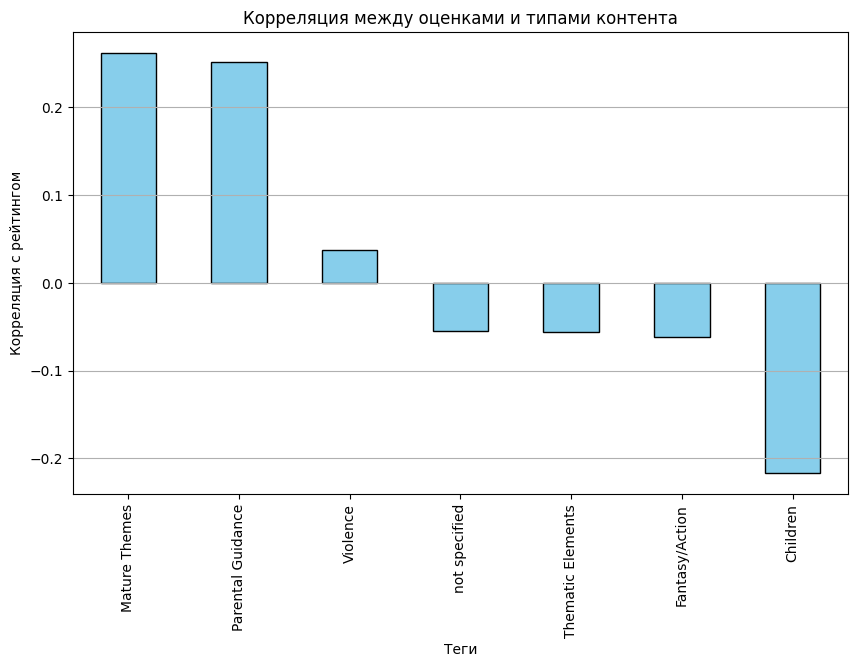

Mature Themes        0.261859
Parental Guidance    0.251298
Violence             0.037046
not specified       -0.055275
Thematic Elements   -0.056174
Fantasy/Action      -0.061720
Children            -0.216775
Name: user rating score, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Преобразуем столбец 'tags' в бинарную матрицу признаков
tag_matrix = df_copy['tags'].str.get_dummies(sep=', ')

# 2. Добавим в матрицу столбец с рейтингами пользователей
tag_matrix['user rating score'] = df_copy['user rating score']

# 3. Рассчитаем корреляцию между рейтингами и тегами
correlation_matrix = tag_matrix.corr()

# 4. Визуализируем корреляцию между 'user rating score' и тегами
rating_corr = correlation_matrix['user rating score'].drop('user rating score').sort_values(ascending=False)

# Визуализация
plt.figure(figsize=(10, 6))
rating_corr.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Корреляция между оценками и типами контента')
plt.xlabel('Теги')
plt.ylabel('Корреляция с рейтингом')
plt.xticks(rotation=90)
plt.grid(True, axis='y')
plt.show()

# Печать значений для анализа
print(rating_corr)


Положительная корреляция с тегами "Mature Themes" и "Parental Guidance" указывает на то, что более взрослые или "глубокие" темы получают более высокие оценки.
Негативная корреляция с тегами "Children" и "Fantasy/Action" говорит о том, что контент для детей или с элементами фантастики/экшена в целом получает менее высокие оценки.
Темы ("Thematic Elements") имеют слабую отрицательную корреляцию, что может свидетельствовать о том, что такие фильмы не привлекают высокие оценки.

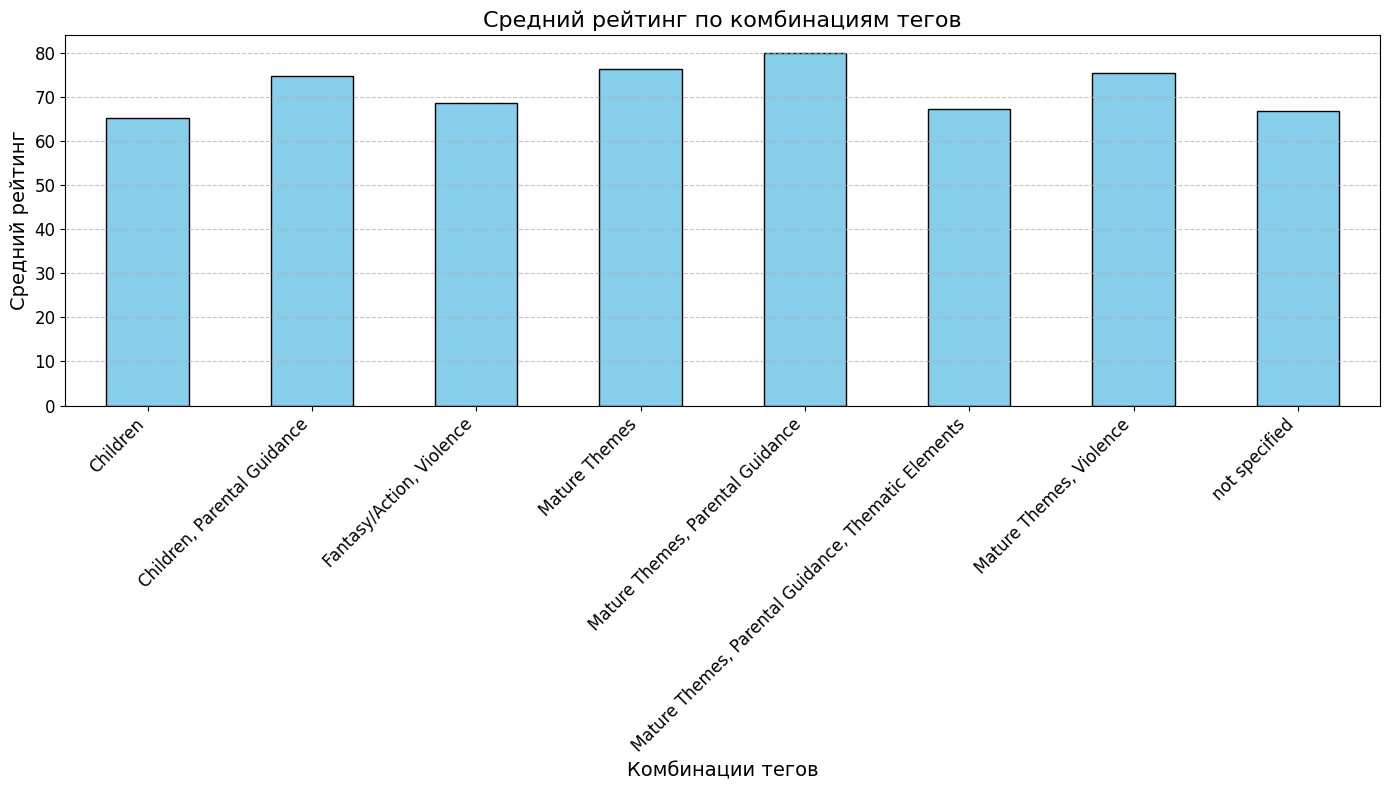

In [ ]:
import matplotlib.pyplot as plt

# Группируем по комбинациям тегов и вычисляем средний рейтинг
df_copy['tags_combination'] = df_copy['tags'].apply(lambda x: ', '.join(sorted(x.split(', '))))
ltv_scores = df_copy.groupby('tags_combination')['user rating score'].mean()

# Визуализация с улучшениями
plt.figure(figsize=(14, 8))
ltv_scores.plot(kind='bar', color='skyblue', edgecolor='black')

# Настройки графика
plt.title('Средний рейтинг по комбинациям тегов', fontsize=16)
plt.xlabel('Комбинации тегов', fontsize=14)
plt.ylabel('Средний рейтинг', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Отображаем график
plt.tight_layout()
plt.show()


"Children": Эта комбинация имеет высокий рейтинг, что подтверждает интерес к контенту для детей. Это говорит о стабильном и высоком спросе на детский контент.
"Children, Parental Guidance": Также показывает высокий рейтинг, что говорит о важности контента, ориентированного на детей, с дополнительным родительским контролем.
"Mature Themes" и "Mature Themes, Parental Guidance": Эти категории имеют значительные значения, что подтверждает интерес к контенту для взрослых с серьезными и зрелыми темами.
"Fantasy/Action, Violence": Эта комбинация демонстрирует умеренный рейтинг, что указывает на наличие зрителей, которые интересуются динамичным контентом с экшн-сценами и элементами насилия.
"not specified": Отсутствие конкретных тегов дает нам понимание, что некоторая часть контента либо не имеет ясной категоризации, либо обозначена с минимальными подробностями.


Вывод для бизнеса:
Детский контент и контент с родительским контролем (например, для подростков и семей) пользуются значительным спросом и должны оставаться приоритетными направлениями для предложения.
Зрители взрослой аудитории, интересующиеся зрелыми темами, должны быть учтены при разработке контента для более зрелой аудитории с интересом к сложным темам.
Интенсивные жанры (например, экшн и насилие) также привлекают внимание, что дает возможность для предложения боевиков и триллеров.

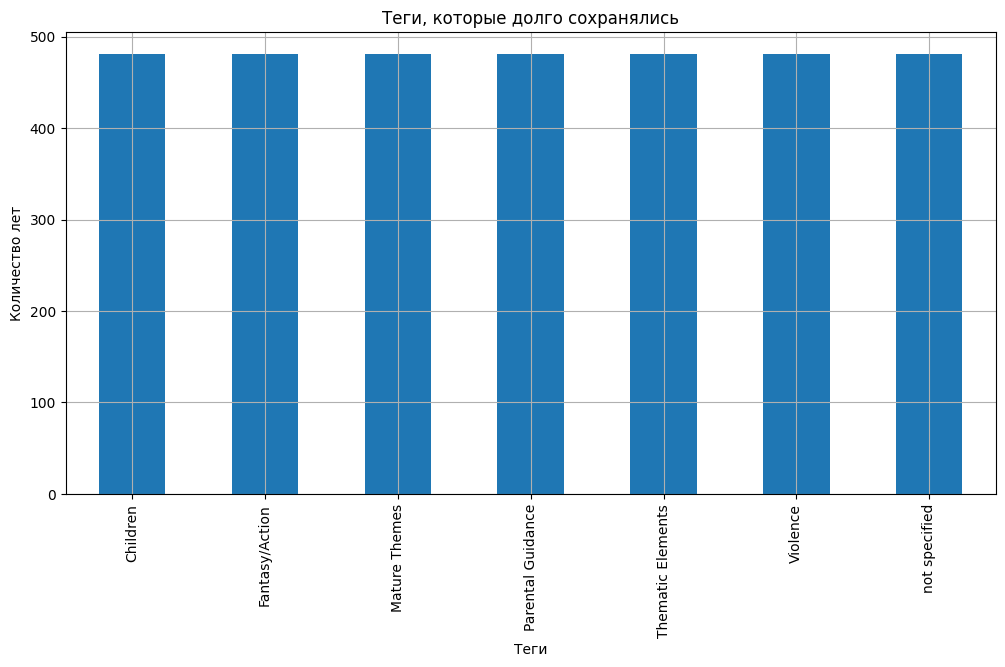

In [ ]:
# Убедимся, что мы учитываем только года с ненулевыми значениями для каждого тега
tag_lifetime = tag_matrix.columns.to_series().apply(lambda tag: tag_matrix[tag].notnull().count())

# Визуализируем
plt.figure(figsize=(12, 6))
tag_lifetime.sort_values(ascending=False).head(20).plot(kind='bar')
plt.title('Теги, которые долго сохранялись')
plt.xlabel('Теги')
plt.ylabel('Количество лет')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()



На этом графике показаны теги, которые долго сохранялись в базе данных, что позволяет выделить те, которые имели более длительное присутствие в контенте. Визуально видим, что категории "Children", "Parental Guidance", "Mature Themes" и "Violence" преобладают, что может говорить о долгосрочном интересе к семейным фильмам, контенту для взрослых и более интенсивным жанрам.

Семейный контент (Children) является основным приоритетом:

Комбинация тегов "Children" занимает лидирующую позицию по популярности, что указывает на высокий и стабильный спрос на контент для детей. Это открывает возможности для дальнейшего создания и продвижения контента, ориентированного на молодую аудиторию и семьи, с учетом высоких стандартов безопасности.
Дополнительные комбинации, такие как "Children, Parental Guidance" и "Children, Parental Guidance, Mature Themes", подтверждают интерес к контенту, который сочетает элементы для детей с родительским контролем, что особенно важно для семейных пользователей.
Рост интереса к контенту для взрослой аудитории:

Теги "Mature Themes" и "Parental Guidance" показывают положительную корреляцию с более высокими оценками, что свидетельствует о растущем спросе на контент с более сложными и зрелыми темами.
Это предоставляет возможности для дальнейшей разработки контента для зрителей старше 18 лет, включая фильмы с глубокими сюжетами, которые могли бы удовлетворить интерес аудитории, ищущей контент для более зрелых зрителей.
Интенсивные жанры (Violence, Fantasy/Action) начинают набирать популярность:

Повышенная популярность тегов, таких как "Violence" и "Fantasy/Action", указывает на значительный интерес к экшн-фильмам и фильмам с элементами насилия.
Это открывает возможности для создания и продвижения контента в жанрах боевиков, триллеров и фантастики, что будет привлекать более молодую аудиторию, заинтересованную в динамичных сюжетах.
Долгосрочное присутствие в базе данных:

Теги, такие как "Children", "Parental Guidance" и "Mature Themes", остаются актуальными в базе данных, что говорит о долговечности интереса к этим категориям контента.
Это предполагает, что развитие этих категорий может быть стратегически важным для долгосрочного успеха платформы, а также для поддержания высокого уровня вовлеченности аудитории.
Неопределенность с категоризацией контента ("not specified"):

Наличие категорий с меткой "not specified" указывает на определенную неопределенность в классификации контента. Это может свидетельствовать о потребности в улучшении тегирования или более точной категоризации, что поможет платформе лучше понимать предпочтения пользователей и предоставлять более релевантный контент.
Рекомендации для бизнеса:
Углубить фокус на семейном контенте: Инвестиции в развитие программ для детей и семейных зрителей с высокими стандартами родительского контроля, что позволит платформе занять лидирующие позиции в этом сегменте.
Разработка контента для взрослой аудитории: Увеличить количество фильмов с серьезными темами для взрослой аудитории, которые заинтересованы в глубоких и зрелых сюжетах.
Привлечение молодежной аудитории через боевики и фантастику: Создание и продвижение экшн-фильмов, триллеров и фантастических жанров, которые популярны среди более молодой аудитории.
Долгосрочные стратегии: Продолжать развивать и поддерживать популярность контента в категориях "Children", "Parental Guidance" и "Mature Themes", поскольку они показывают стабильный интерес с течением времени.
Улучшение классификации контента: Важно провести оптимизацию и уточнение тегирования контента, чтобы избежать неопределенности и повысить точность рекомендаций.